# Mini-Projet Intelligence Artificielle : Prédiction du Revenu Annuel d'un Marocain

**Membres du Groupe :**
*   Saad Barhrouj
*   Nassim El Kaddaoui
*   Youness Kihel

**Année :** 2ème année Cycle d’Ingénieurs – GI
**Module :** Intelligence Artificielle
**Encadrant :** Y. EL YOUNOUSSI
**Année Universitaire :** 2024-2025

## Objectif du Mini-Projet
L'objectif général de ce mini-projet est de construire un pipeline complet de Machine Learning en Python pour prédire le revenu annuel des Marocains à partir de données simulées réalistes. Le projet couvre toutes les étapes de développement d’un modèle de Machine Learning : compréhension des données, préparation des données, modélisation, évaluation et déploiement.


## 0. Importation des Librairies et Configuration Initiale

Cette section importe les librairies Python nécessaires pour l'analyse et la manipulation des données, ainsi que pour la visualisation. Des configurations pour l'affichage des DataFrames Pandas sont également définies pour une meilleure lisibilité.

In [1]:
# Librairies de base pour la manipulation de données
import pandas as pd
import numpy as np

# Librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Librairie pour le profilage de données (alternative à Sweetviz)
from ydata_profiling import ProfileReport # ou from pandas_profiling import ProfileReport pour les anciennes versions

# Options d'affichage pour Pandas
pd.set_option('display.max_columns', None) # Afficher toutes les colonnes
pd.set_option('display.max_rows', 100)      # Afficher jusqu'à 100 lignes
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formater les floats à 2 décimales

# Pour rendre les graphiques Matplotlib plus esthétiques (style seaborn)
plt.style.use('seaborn-v0_8-whitegrid') # Vous pouvez choisir un autre style seaborn

# Ignorer les avertissements (à utiliser avec précaution, notamment en phase d'exploration)
import warnings
warnings.filterwarnings('ignore')

# Constante pour la reproductibilité des résultats lors des étapes aléatoires (train_test_split, modèles, etc.)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Assure la reproductibilité pour les opérations numpy aléatoires du notebook (la génération du CSV est séparée)


/Users/youns/Desktop/Projects/ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Compréhension des Données

La première étape cruciale dans tout projet de Machine Learning est de bien comprendre les données avec lesquelles nous travaillons. Cela implique de charger le dataset, d'inspecter sa structure, ses types de données, ses statistiques descriptives, et d'explorer les relations entre les variables. Les données utilisées ici ont été générées par le script `generate_dataset-kihel.py`.

### 1.1. Chargement du Dataset

Nous commençons par charger le fichier CSV `dataset_revenu_marocains.csv` (préalablement généré) dans un DataFrame Pandas.

In [2]:
# Chemin vers le fichier dataset (s'assurer qu'il est accessible)
file_path = "dataset_revenu_marocains.csv" 

# Chargement du dataset
try:
    df_original = pd.read_csv(file_path) # On le nomme df_original pour garder une copie intacte
    df = df_original.copy() # On travaillera sur une copie pour éviter de recharger en cas d'erreur
    print(f"Dataset '{file_path}' chargé avec succès.")
    print(f"Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print(f"ERREUR : Le fichier '{file_path}' n'a pas été trouvé. Veuillez vérifier le chemin et le nom du fichier.")
    df = None # Pour éviter les erreurs dans les cellules suivantes si le fichier n'est pas trouvé
except Exception as e:
    print(f"Une erreur est survenue lors du chargement du fichier : {e}")
    df = None

Dataset 'dataset_revenu_marocains.csv' chargé avec succès.
Le dataset contient 40000 lignes et 18 colonnes.


### 1.2. Affichage des Données : Aperçu Initial

Pour avoir une première idée du contenu du dataset, nous affichons les 10 premières et les 5 dernières instances. Cela nous permet de voir les noms des colonnes et quelques exemples de valeurs.

In [3]:
if df is not None: 
    print("Affichage des 10 premières lignes du dataset :")
    display(df.head(10))

    print("\nAffichage des 5 dernières lignes du dataset :")
    display(df.tail(5))
else:
    print("Le DataFrame n'a pas été chargé. Impossible d'afficher les données.")

Affichage des 10 premières lignes du dataset :


,Age,Categorie_age,Sexe,Milieu,Region_geographique,Etat_matrimonial,Niveau_education,Annees_experience,CSP,Secteur_emploi,Propriete_immobiliere,Vehicule_motorise,Terrain_agricole,Revenu_secondaire,Revenu_Annuel,Revenu_Mensuel,Adresse_Email,CIN
0,40,Adulte,Femme,Urbain,Nord,Marié,Fondamental,1.00,Agriculteurs,Informel,Non,Non,Oui,Non,16483.00,1373.58,usera0bdec@example.com,AT526850
1,59,Senior,Homme,Urbain,Est,Marié,Fondamental,2.00,Ouvriers,Privé,Oui,Non,Non,NaN,26983.00,2248.58,user930317@example.com,OB913868
2,20,Jeune,Homme,Rural,Centre,Célibataire,Secondaire,0.00,Ouvriers,Informel,Non,Non,Non,Non,931.00,77.58,usere064a1@example.com,CD302566
3,23,Jeune,Femme,Urbain,Ouest,Marié,Secondaire,2.00,Ouvriers,Informel,Non,Non,Non,Non,14298.00,1191.50,usere2a6da@example.com,XB646739
4,51,Senior,Homme,Rural,Est,Divorcé,Sans niveau,15.00,Agriculteurs,Informel,Oui,Non,Oui,Non,503.00,41.92,usercf01a3@example.com,YP691033
5,60,Âgé,Homme,Rural,Est,Marié,Fondamental,25.00,Ouvriers,Privé,Non,Non,Non,Non,225.00,18.75,user5f1f1d@example.com,OG207042
6,37,Adulte,Homme,Urbain,Nord,Célibataire,Fondamental,11.00,Ouvriers,Informel,Non,Non,Non,Non,16356.00,1363.00,user0b590e@example.com,EZ729341
7,30,Adulte,Homme,Rural,Nord,Marié,Fondamental,11.00,Ouvriers,Informel,Oui,Non,Non,Non,225.00,18.75,userfa18db@example.com,EK765058
8,44,Adulte,Homme,Rural,Est,Marié,Secondaire,17.00,Professions intermédiaires,Privé,Oui,Non,Non,Oui,53856.00,4488.00,userab9316@example.com,SC790237
9,34,Adulte,Homme,Urbain,Centre,Célibataire,Fondamental,13.00,Ouvriers,Privé,Non,Non,Non,Non,25402.00,2116.83,user0ba5f5@example.com,PQ798622



Affichage des 5 dernières lignes du dataset :


,Age,Categorie_age,Sexe,Milieu,Region_geographique,Etat_matrimonial,Niveau_education,Annees_experience,CSP,Secteur_emploi,Propriete_immobiliere,Vehicule_motorise,Terrain_agricole,Revenu_secondaire,Revenu_Annuel,Revenu_Mensuel,Adresse_Email,CIN
39995,23,Jeune,Homme,Rural,Ouest,Marié,Secondaire,2.00,Ouvriers,Informel,Non,Non,Non,Non,359.00,29.92,user45379c@example.com,DZ114182
39996,36,Adulte,Homme,Urbain,Centre,Marié,Sans niveau,NaN,Agriculteurs,Privé,Non,Non,Oui,Non,20910.00,1742.50,userf1a545@example.com,GW208604
39997,62,Âgé,Homme,Urbain,Nord,Divorcé,Fondamental,42.00,Ouvriers,Privé,Non,Non,Non,Non,28885.00,2407.08,user01d7d1@example.com,IX883938
39998,54,Senior,Femme,Urbain,Ouest,Marié,Secondaire,30.00,Professions intermédiaires,Privé,Oui,Oui,Non,Oui,39617.00,3301.42,usere62708@example.com,ED662517
39999,46,Senior,Homme,Urbain,Est,Marié,Fondamental,14.00,Ouvriers,Privé,Non,Non,Non,Oui,19493.00,1624.42,user719b85@example.com,KB351274


**Observation de l'aperçu initial :**
*   Les colonnes correspondent aux caractéristiques définies dans le script de génération, incluant les informations sociodémographiques, les biens, l'emploi et la variable cible `Revenu_Annuel`.
*   Les types de données semblent variés (numériques pour l'âge, le revenu ; textuels/catégoriels pour le sexe, le milieu, etc.).
*   Les colonnes non pertinentes (`Adresse_Email`, `CIN`) et la colonne redondante (`Revenu_Mensuel`) sont présentes comme attendu.

### 1.3. Description Générale et Statistique des Données

Nous examinons maintenant plus en détail les caractéristiques de notre dataset :
*   **Volume et Dimensions :** Nombre total d'instances (lignes) et d'attributs (colonnes).
*   **Types de Données et Valeurs Manquantes :** Nature de chaque attribut et détection des valeurs manquantes.
*   **Statistiques Descriptives :** Indicateurs clés pour les variables numériques et fréquences pour les variables catégorielles.

In [4]:
if df is not None:
    # Volume et Dimensions (déjà affiché au chargement, mais on peut le reconfirmer)
    print("--- Volume et Dimensions ---")
    num_instances, num_attributes = df.shape
    print(f"Nombre total d'instances (lignes) : {num_instances}")
    print(f"Nombre total d'attributs (colonnes) : {num_attributes}")

    # Types de Données, Valeurs Manquantes
    print("\n--- Informations sur les Attributs (Types, Valeurs Manquantes) ---")
    df.info()
else:
    print("Le DataFrame n'a pas été chargé.")

--- Volume et Dimensions ---
Nombre total d'instances (lignes) : 40000
Nombre total d'attributs (colonnes) : 18

--- Informations sur les Attributs (Types, Valeurs Manquantes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40000 non-null  int64  
 1   Categorie_age          40000 non-null  object 
 2   Sexe                   40000 non-null  object 
 3   Milieu                 40000 non-null  object 
 4   Region_geographique    40000 non-null  object 
 5   Etat_matrimonial       39399 non-null  object 
 6   Niveau_education       40000 non-null  object 
 7   Annees_experience      39399 non-null  float64
 8   CSP                    40000 non-null  object 
 9   Secteur_emploi         37382 non-null  object 
 10  Propriete_immobiliere  39400 non-null  object 
 11  Vehicule_motorise      39383 n

**Analyse des Informations Générales (df.info()) :**
*   Le dataset contient 40 000 instances et 18 attributs, conformément à la génération.
*   Les types de données `int64`, `float64` et `object` sont présents, correspondant respectivement aux variables numériques entières (ex: `Age`), numériques à virgule (ex: `Revenu_Mensuel`), et catégorielles/textuelles (ex: `Sexe`, `Milieu`).
*   Les colonnes suivantes présentent des valeurs manquantes (nombre de valeurs non-nulles < 40000) : `Etat_matrimonial`, `Secteur_emploi`, `Revenu_secondaire`, `Propriete_immobiliere`, `Vehicule_motorise`, `Terrain_agricole`, et `Annees_experience`. Cela est conforme à l'introduction intentionnelle de valeurs manquantes (environ 1.5% par colonne ciblée) lors de la génération des données.

In [5]:
if df is not None:
    # Statistiques Descriptives pour les attributs numériques
    print("\n--- Statistiques Descriptives (Attributs Numériques) ---")
    display(df.describe(include=[np.number]).T) # .T pour transposer et améliorer la lisibilité
else:
    print("Le DataFrame n'a pas été chargé.")


--- Statistiques Descriptives (Attributs Numériques) ---


,count,mean,std,min,25%,50%,75%,max
Age,40000.00,40.59,13.42,15.00,29.00,41.00,52.00,80.00
Annees_experience,39399.00,10.59,9.99,0.00,2.00,8.00,17.00,47.00
Revenu_Annuel,40000.00,21968.35,39288.94,75.00,2839.00,13381.00,26999.25,610250.00
Revenu_Mensuel,40000.00,1830.70,3274.08,6.25,236.58,1115.08,2249.94,50854.17


**Analyse des Statistiques Numériques :**
*   **Age :** Varie de [min_age] à [max_age] (les valeurs aberrantes à 15 et 80 ans introduites sont visibles), avec une moyenne de [moy_age].
*   **Annees_experience :** La moyenne est de [moy_exp], avec un maximum plausible par rapport à l'âge. Les valeurs manquantes (NaN) sont exclues du calcul `count`.
*   **Revenu_Annuel :**
    *   La moyenne est de [valeur, ex: ~21953.9 DH], ce qui est très proche de la cible globale de 21949 DH.
    *   L'écart-type (`std`) est élevé ([valeur]), indiquant une forte dispersion des revenus.
    *   Le `min` est de [valeur, ex: ~100 DH] et le `max` de [valeur, ex: ~400000 DH], reflétant les valeurs aberrantes basses et hautes introduites.
    *   La médiane (`50%`) est de [valeur]. Si elle est significativement inférieure à la moyenne, cela confirme l'asymétrie positive (distribution étirée vers les hauts revenus).
*   **Revenu_Mensuel :** Les statistiques sont cohérentes avec `Revenu_Annuel` (divisées par 12).

In [6]:
if df is not None:
    # Statistiques Descriptives pour les attributs catégoriels (type 'object')
    print("\n--- Statistiques Descriptives (Attributs Catégoriels) ---")
    display(df.describe(include=['object']).T)
else:
    print("Le DataFrame n'a pas été chargé.")


--- Statistiques Descriptives (Attributs Catégoriels) ---


,count,unique,top,freq
Categorie_age,40000,4,Adulte,17347
Sexe,40000,2,Homme,20891
Milieu,40000,2,Urbain,25786
Region_geographique,40000,5,Centre,12007
Etat_matrimonial,39399,4,Marié,20977
Niveau_education,40000,4,Secondaire,14047
CSP,40000,6,Ouvriers,19449
Secteur_emploi,37382,3,Privé,16655
Propriete_immobiliere,39400,2,Non,27844
Vehicule_motorise,39383,2,Non,25887


**Analyse des Statistiques Catégorielles :**
*   **Milieu :** 2 valeurs uniques. La modalité `[Urbain/Rural]` est la plus fréquente avec [freq] occurrences ([pourcentage]%), ce qui correspond à la proportion cible (`P_URBAIN` ~64.3%).
*   **Sexe :** 2 valeurs uniques, avec une légère prédominance pour `[Homme/Femme]` ([pourcentage]%).
*   **Niveau_education :** 4 valeurs uniques. `[Fondamental/Secondaire]` sont les plus fréquentes.
*   **CSP :** 6 valeurs uniques. La répartition semble diversifiée.
*   **Region_geographique, Secteur_emploi, etc. :** Le nombre de valeurs uniques (`unique`) et la modalité la plus fréquente (`top`) sont conformes à leur définition dans le script de génération.
*   `Adresse_Email` et `CIN` ont un nombre élevé de valeurs uniques (proche de 40000), confirmant leur rôle de colonnes non pertinentes pour la modélisation directe.

In [7]:
if df is not None:
    print("\n--- Nombre de Valeurs Uniques par Colonne (Triées) ---")
    valeurs_uniques = pd.DataFrame(df.nunique(), columns=['Nombre_Valeurs_Uniques'])
    valeurs_uniques['Type_Donnee'] = df.dtypes # Ajoute le type de donnée pour contexte
    display(valeurs_uniques.sort_values(by='Nombre_Valeurs_Uniques', ascending=False))
else:
    print("Le DataFrame n'a pas été chargé.")


--- Nombre de Valeurs Uniques par Colonne (Triées) ---


,Nombre_Valeurs_Uniques,Type_Donnee
CIN,39999,object
Adresse_Email,39946,object
Revenu_Annuel,20905,float64
Revenu_Mensuel,20905,float64
Age,51,int64
Annees_experience,48,float64
CSP,6,object
Region_geographique,5,object
Etat_matrimonial,4,object
Niveau_education,4,object


**Analyse des Valeurs Uniques :**
*   Les colonnes `Adresse_Email` et `CIN` présentent le plus grand nombre de valeurs uniques, ce qui est attendu car elles sont conçues pour être uniques ou quasi-uniques et non pertinentes pour la prédiction.
*   `Revenu_Annuel` et `Revenu_Mensuel` ont également un grand nombre de valeurs uniques, ce qui est normal pour des variables cibles continues.
*   Les variables catégorielles comme `Sexe` (2), `Milieu` (2), `Niveau_education` (4), `CSP` (6), `Categorie_age` (4), etc., ont un nombre limité et attendu de modalités.

### 1.4. Exploration Approfondie avec YData-Profiling

Pour une compréhension plus fine des données, nous utilisons la librairie `ydata-profiling`. Elle génère un rapport HTML interactif qui fournit une analyse détaillée de chaque variable, les interactions entre variables, les corrélations, les valeurs manquantes, les doublons, et d'autres informations pertinentes.

**Note :** L'exécution de cette cellule peut prendre quelques instants.

In [8]:
# ASSUREZ-VOUS QUE CETTE CELLULE EST EXÉCUTÉE APRÈS QUE LES PRÉCÉDENTES AIENT RÉUSSI

if 'df' in locals() and df is not None and isinstance(df, pd.DataFrame) and not df.empty:
    print("Début de la génération du rapport d'exploration des données...")
    print(f"Le DataFrame a {df.shape[0]} lignes et {df.shape[1]} colonnes.")
    
    profile_output_file = "rapport_exploration_donnees_groupe.html"
    
    try:
        print("Initialisation de ProfileReport...")
        profile = ProfileReport(
            df, 
            title="Rapport d'Exploration - Revenu Annuel des Marocains (Groupe Barhrouj, El Kaddaoui, Kihel)", 
            explorative=True
            # Les options dark_mode et orange_mode ont été supprimées car elles causaient une ValidationError
        )
        print("ProfileReport initialisé. Tentative de génération du fichier HTML...")
        
        profile.to_file(profile_output_file)
        
        print(f"SUCCESS: Rapport d'exploration sauvegardé sous : '{profile_output_file}'")
        print("Veuillez vérifier si le fichier existe dans votre répertoire et ouvrez-le dans un navigateur.")
        
    except Exception as e:
        print(f"ERREUR LORS DE LA GÉNÉRATION DU RAPPORT ProfileReport:")
        import traceback
        print(traceback.format_exc()) 
        
elif 'df' not in locals() or df is None:
    print("ERREUR CRITIQUE : Le DataFrame 'df' n'a pas été chargé ou est None. Impossible de générer le rapport.")
elif not isinstance(df, pd.DataFrame):
    print(f"ERREUR CRITIQUE : 'df' n'est pas un DataFrame Pandas. Type actuel : {type(df)}. Impossible de générer le rapport.")
elif df.empty:
    print("ERREUR CRITIQUE : Le DataFrame 'df' est vide. Impossible de générer le rapport.")
else:
    print("Condition inattendue rencontrée avant la génération du rapport.")

Début de la génération du rapport d'exploration des données...
Le DataFrame a 40000 lignes et 18 colonnes.
Initialisation de ProfileReport...
ProfileReport initialisé. Tentative de génération du fichier HTML...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 103.26it/s]

SUCCESS: Rapport d'exploration sauvegardé sous : 'rapport_exploration_donnees_groupe.html'
Veuillez vérifier si le fichier existe dans votre répertoire et ouvrez-le dans un navigateur.


**Analyse du Rapport d'Exploration (`rapport_exploration_donnees_groupe.html`) :**

1.  **Overview Tab :**
    *   **Dataset statistics :**
        *   Nombre de variables : 18
        *   Nombre d'observations : 40000
        *   Cellules manquantes (Missing cells) : 6178 (soit 0.9% du total des cellules)
        *   Lignes dupliquées (Duplicate rows) : 0 (soit 0.0%)
        *   Taille totale en mémoire : 32.9 MiB
    *   **Variable types :**
        *   Numériques (Real number (ℝ)) : 4 (`Age`, `Annees_experience`, `Revenu_Annuel`, `Revenu_Mensuel`)
        *   Catégorielles : 12
        *   Text : 2 (`Adresse_Email`, `CIN`)

    *   **Alerts (16 au total) :**
        *   **Corrélations élevées (High correlation) :**
            *   `Age` est fortement corrélé avec `Annees_experience` et `Categorie_age`. *Attendu, car `Categorie_age` est directement dérivée de `Age`, et l'expérience augmente généralement avec l'âge.*
            *   `CSP` est fortement corrélé avec `Niveau_education` et `Terrain_agricole`. *Logique, le niveau d'éducation influence la CSP, et la possession d'un terrain agricole est typique de la CSP "Agriculteurs".*
            *   `Revenu_Annuel` est fortement corrélé avec `Revenu_Mensuel`. *Attendu (redondance parfaite).*
            *   *(Les autres alertes de corrélation sont des réciproques de celles-ci ou des confirmations de liens logiques).*
        *   **Valeurs manquantes (Missing) :**
            *   `Etat_matrimonial` : 603 manquantes (1.5%).
            *   `Annees_experience` : 604 manquantes (1.5%).
            *   `Secteur_emploi` : 2498 manquantes (6.2%). *Ce pourcentage plus élevé s'explique par le fait que les individus 'Inactifs' (CSP) n'ont pas de secteur d'emploi.*
            *   `Propriete_immobiliere` : 632 manquantes (1.6%).
            *   `Vehicule_motorise` : 563 manquantes (1.4%).
            *   `Terrain_agricole` : 611 manquantes (1.5%).
            *   `Revenu_secondaire` : 667 manquantes (1.7%).
            *   *Ces pourcentages sont conformes à la génération intentionnelle de données manquantes.*
        *   **Zéros (Zeros) :**
            *   `Annees_experience` a 5111 zéros (12.8%). *Représente les individus jeunes ou en début de carrière.*
        *   *[Le rapport HTML peut également signaler "Skewed" pour `Revenu_Annuel` et "High Cardinality" pour `Adresse_Email`/`CIN` sous l'onglet "Alerts". Il est bon de le vérifier et de l'ajouter si c'est le cas.]*

    *   **Reproduction :**
        *   Analyse démarrée le : 2025-05-09 01:27:23
        *   Analyse terminée le : 2025-05-09 01:27:29
        *   Durée : 6.13 secondes
        *   Version de ydata-profiling : v4.16.1 *(La version peut varier)*

2.  **Variables Tab (Analyse Détaillée) :**
    *   **Variables Numériques :**
        *   `Age` : 51 valeurs distinctes, min 15, max 80, moyenne 40.6 ans. La distribution (à voir sur l'histogramme du rapport HTML) semble relativement étalée avec les outliers introduits. Skewness de 0.027 (très faible asymétrie). Kurtosis de -1.12 (platykurtique, distribution plus aplatie que la normale).
        *   `Annees_experience` : 48 valeurs distinctes, min 0, max 47, moyenne 10.5 ans. 1.5% de NaN, 12.8% de zéros. Skewness de 1.018 (asymétrie positive, queue vers les valeurs élevées). Kurtosis de 0.28 (leptokurtique, distribution légèrement plus piquée que la normale).
        *   `Revenu_Annuel` : 21068 valeurs distinctes, min 80 DH, max 608803 DH, moyenne ~21932 DH. **Skewness de 7.528 (très forte asymétrie positive)** et **Kurtosis de 82.45 (extrêmement leptokurtique, pic très élevé et queues épaisses)**. Cela confirme que la distribution est fortement concentrée sur les bas revenus avec quelques revenus très élevés. L'histogramme du rapport HTML illustrera cela de manière frappante. La valeur la plus fréquente est 239 DH (6.7% des cas), ce qui est un outlier bas.
        *   `Revenu_Mensuel` : Statistiques (skewness, kurtosis) identiques à `Revenu_Annuel`, valeurs proportionnelles.
    *   **Variables Catégorielles (Distribution des principales modalités) :**
        *   `Categorie_age` : Adulte (43.3%), Senior (32.7%), Jeune (15.1%), Âgé (8.9%).
        *   `Sexe` : Homme (51.9%), Femme (48.1%).
        *   `Milieu` : Urbain (64.2%), Rural (35.8%). *Conforme à `P_URBAIN`.*
        *   `Region_geographique` : Centre (29.9%), Nord (24.7%), Est (15.3%), Ouest (15.2%), Sud (14.8%).
        *   `Etat_matrimonial` : Marié (52.8% des non-manquants), Célibataire (24.2%), Divorcé (11.0%), Veuf (10.6%).
        *   `Niveau_education` : Secondaire (35.0%), Fondamental (34.8%), Supérieur (15.2%), Sans niveau (15.0%).
        *   `CSP` : Ouvriers (48.4%), Employés (16.7%), Professions intermédiaires (13.3%), Agriculteurs (11.3%), Cadres supérieurs (5.3%), Inactifs (5.0%).
        *   `Secteur_emploi` : Privé (41.7% des non-manquants), Informel (39.7%), Public (12.3%). 6.2% de valeurs manquantes.
        *   `Propriete_immobiliere` : Non (69.6% des non-manquants), Oui (28.8%).
        *   `Vehicule_motorise` : Non (64.8% des non-manquants), Oui (33.8%).
        *   `Terrain_agricole` : Non (85.7% des non-manquants), Oui (12.8%).
        *   `Revenu_secondaire` : Non (79.0% des non-manquants), Oui (19.3%).
    *   **Variables Text :**
        *   `Adresse_Email` : 39950 valeurs distinctes (99.9%).
        *   `CIN` : 39999 valeurs distinctes (>99.9%).
        *   *Le rapport note quelques emails et CIN dupliqués (fréquence de 2 pour certains), une petite imperfection de la génération aléatoire d'identifiants.*

3.  **Correlations Tab (Table de corrélation de Pearson) :**
    *   **Corrélations avec `Revenu_Annuel` :**
        *   `CSP` : 0.190
        *   `Niveau_education` : 0.185
        *   `Vehicule_motorise` : 0.177
        *   `Propriete_immobiliere` : 0.168
        *   `Secteur_emploi` : 0.153
        *   `Annees_experience` : 0.138
        *   `Age` : 0.132
        *   `Revenu_secondaire` : 0.129
        *   `Milieu` : 0.116
        *   Les corrélations linéaires avec `Revenu_Annuel` sont globalement faibles à modérées. `Sexe` (0.043) et `Etat_matrimonial` (0.032) montrent des corrélations linéaires particulièrement faibles, ce qui ne signifie pas qu'elles n'ont pas d'influence (l'influence peut être non linéaire ou dépendre d'interactions).
    *   **Autres corrélations notables entre prédicteurs (multicollinéarité potentielle) :**
        *   `Age` vs `Categorie_age` : 0.857 (très forte, logique)
        *   `Age` vs `Annees_experience` : 0.675 (forte)
        *   `CSP` vs `Terrain_agricole` : 0.662 (forte)
        *   `CSP` vs `Niveau_education` : 0.585 (forte)
        *   `CSP` vs `Secteur_emploi` : 0.452 (modérée à forte)
        *   `CSP` vs `Propriete_immobiliere` : 0.434 (modérée à forte)
        *   `CSP` vs `Vehicule_motorise` : 0.402 (modérée)
    *   La corrélation entre `Revenu_Annuel` et `Revenu_Mensuel` est de 1.000, confirmant la redondance.

4.  **Missing Values Tab :**
    *   *(Ouvrez votre rapport HTML, allez à l'onglet "Missing values". Regardez la "Matrix" et le "Dendrogram". Le dendrogramme montre-t-il des regroupements de variables qui ont tendance à avoir des NaN ensemble ? Par exemple, les variables de possession de biens ont-elles des NaN qui se ressemblent ? Notez ici s'il y a des patterns ou si les NaN semblent distribués de manière plutôt indépendante (ce qui est souvent le cas pour une introduction aléatoire comme la vôtre).)*
    *   *Exemple de commentaire : "La matrice des valeurs manquantes ne révèle pas de pattern systématique évident entre les différentes variables, suggérant que les NaN ont été introduits de manière relativement indépendante, à l'exception notable de `Secteur_emploi` dont les NaN sont liés à la CSP 'Inactifs'. Le dendrogramme des valeurs manquantes ne montre pas de clusters forts entre les autres variables à NaN."*

5.  **Sample Tab :**
    *   Confirme l'aperçu des données.

**N.B. : Cohérence avec la Génération et les Objectifs du Projet**
*   L'exploration approfondie via `ydata-profiling` confirme que le dataset est riche et complexe, avec les caractéristiques et les problèmes de données (NaN, outliers, redondance, non-pertinence) introduits intentionnellement.
*   La **très forte asymétrie et le kurtosis élevé de `Revenu_Annuel`** sont des points cruciaux qui devront être traités lors de la préparation des données (ex: transformation logarithmique).
*   Les corrélations linéaires modérées avec la cible suggèrent que des modèles capables de capter des relations non linéaires ou des interactions entre variables pourraient être plus performants.
*   Concernant les cibles statistiques HCP pour la **répartition des revenus** (% < moyenne) :
    *   *(Ajoutez ici les résultats de la cellule de code que vous exécuterez pour recalculer ces pourcentages, comme suggéré précédemment).*
    *   *Exemple : "Après recalcul : % sous moyenne globale: 67.4% (Cible HCP: 71.8%), % sous moyenne urbaine: 65.3% (Cible HCP: 65.9%), % sous moyenne rurale: 84.3% (Cible HCP: 85.4%). Les cibles urbaine et rurale sont bien respectées. La déviation pour la répartition globale (-4.4%) est confirmée."*



## 2. Préparation des Données

Après avoir compris nos données, l'étape suivante consiste à les préparer pour la modélisation. Cela inclut le nettoyage (gestion des doublons, des valeurs manquantes, des outliers) et la transformation (encodage des variables catégorielles, normalisation, ingénierie de caractéristiques).
Conformément aux spécifications, ces étapes seront, autant que possible, intégrées dans des pipelines Scikit-Learn pour assurer un workflow robuste et reproductible.

### 2.1. Nettoyage des Données

Suite aux résultats de l'analyse exploratoire, nous allons procéder au nettoyage des données. Cela implique :
*   L'élimination des éventuels doublons.
*   Le traitement des valeurs manquantes.
*   Le traitement des valeurs aberrantes (outliers).

Nous allons commencer par créer une copie de notre DataFrame pour cette phase de préparation et séparer les caractéristiques (X) de la variable cible (y).

In [9]:
if df is not None:
    # Créer une copie pour ne pas modifier le df original chargé
    df_processed = df.copy()

    # Séparation des caractéristiques (X) et de la variable cible (y)
    # La variable cible est 'Revenu_Annuel'
    X = df_processed.drop('Revenu_Annuel', axis=1)
    y = df_processed['Revenu_Annuel']

    print("Caractéristiques X (premières lignes) :")
    display(X.head())
    print("\nVariable cible y (premières lignes) :")
    display(y.head())
    print(f"\nDimensions de X : {X.shape}")
    print(f"Dimensions de y : {y.shape}")
else:
    print("DataFrame df non chargé. Exécution interrompue.")
    # Gérer l'erreur ou arrêter le notebook

Caractéristiques X (premières lignes) :


,Age,Categorie_age,Sexe,Milieu,Region_geographique,Etat_matrimonial,Niveau_education,Annees_experience,CSP,Secteur_emploi,Propriete_immobiliere,Vehicule_motorise,Terrain_agricole,Revenu_secondaire,Revenu_Mensuel,Adresse_Email,CIN
0,40,Adulte,Femme,Urbain,Nord,Marié,Fondamental,1.00,Agriculteurs,Informel,Non,Non,Oui,Non,1373.58,usera0bdec@example.com,AT526850
1,59,Senior,Homme,Urbain,Est,Marié,Fondamental,2.00,Ouvriers,Privé,Oui,Non,Non,NaN,2248.58,user930317@example.com,OB913868
2,20,Jeune,Homme,Rural,Centre,Célibataire,Secondaire,0.00,Ouvriers,Informel,Non,Non,Non,Non,77.58,usere064a1@example.com,CD302566
3,23,Jeune,Femme,Urbain,Ouest,Marié,Secondaire,2.00,Ouvriers,Informel,Non,Non,Non,Non,1191.50,usere2a6da@example.com,XB646739
4,51,Senior,Homme,Rural,Est,Divorcé,Sans niveau,15.00,Agriculteurs,Informel,Oui,Non,Oui,Non,41.92,usercf01a3@example.com,YP691033



Variable cible y (premières lignes) :


0   16483.00
1   26983.00
2     931.00
3   14298.00
4     503.00
Name: Revenu_Annuel, dtype: float64


Dimensions de X : (40000, 17)
Dimensions de y : (40000,)


#### 2.1.2. Traitement des Valeurs Manquantes (Suite - Intégration dans un prétraitement)

Nous allons maintenant commencer à assembler notre pipeline de prétraitement en utilisant `ColumnTransformer`. Pour l'instant, ce `ColumnTransformer` se concentrera sur l'imputation des valeurs manquantes. Plus tard, nous y ajouterons l'encodage pour les variables catégorielles et la mise à l'échelle (scaling) pour les variables numériques.

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # make_pipeline est aussi bien, Pipeline offre plus de contrôle sur les noms d'étapes
from sklearn.impute import SimpleImputer
# Les autres imports nécessaires comme StandardScaler, OneHotEncoder seront rappelés/ajoutés quand on les utilisera.

if 'X' in locals() and isinstance(X, pd.DataFrame): # Vérifie que X existe et est un DataFrame
    # Colonnes à ignorer pour la modélisation (seront supprimées plus tard, mais utile de les lister ici)
    cols_a_ignorer_pour_modelisation = ['Adresse_Email', 'CIN', 'Revenu_Mensuel'] 

    # Identification des features numériques candidates pour le pipeline
    # (celles qui ne sont pas dans cols_a_ignorer_pour_modelisation)
    numerical_features_candidates = [col for col in X.select_dtypes(include=np.number).columns 
                                     if col not in cols_a_ignorer_pour_modelisation]

    # Identification des features catégorielles candidates pour le pipeline
    categorical_features_candidates = [col for col in X.select_dtypes(include='object').columns
                                       if col not in cols_a_ignorer_pour_modelisation]
    
    # Identifier les colonnes numériques AVEC des NaN parmi les candidates
    impute_median_cols = [col for col in numerical_features_candidates if X[col].isnull().any()]
    
    # Identifier les colonnes catégorielles AVEC des NaN parmi les candidates
    impute_mode_cols = [col for col in categorical_features_candidates if X[col].isnull().any()]

    print("--- Définition du ColumnTransformer pour Imputation ---")
    print(f"Colonnes numériques candidates pour le pipeline : {numerical_features_candidates}")
    print(f"Colonnes catégorielles candidates pour le pipeline : {categorical_features_candidates}")
    print(f"\nColonnes numériques à imputer avec la médiane : {impute_median_cols}")
    print(f"Colonnes catégorielles à imputer avec le mode : {impute_mode_cols}")

    # Création des pipelines spécifiques pour chaque type de traitement d'imputation
    # Pour les colonnes numériques qui ont des NaN
    # (ex: 'Annees_experience')
    numerical_imputation_pipeline = Pipeline([
        ('imputer_num', SimpleImputer(strategy='median'))
        # Étape de scaling (ex: StandardScaler) sera ajoutée ici plus tard
    ])

    # Pour les colonnes catégorielles qui ont des NaN
    # (ex: 'Etat_matrimonial', 'Secteur_emploi', etc.)
    categorical_imputation_pipeline = Pipeline([
        ('imputer_cat', SimpleImputer(strategy='most_frequent'))
        # Étape d'encodage (ex: OneHotEncoder) sera ajoutée ici plus tard
    ])

    # Création du ColumnTransformer
    # Ce transformateur appliquera les pipelines ci-dessus aux colonnes spécifiées.
    # Les autres colonnes (celles sans NaN parmi les candidates, et celles qui seront ignorées)
    # passeront pour l'instant sans modification grâce à remainder='passthrough'.
    
    # Note: On ne liste que les colonnes QUI ONT des NaN pour l'imputation.
    # Les colonnes qui n'ont pas de NaN et qui ne sont pas dans cols_a_ignorer_pour_modelisation
    # seront gérées par 'remainder="passthrough"' ou par d'autres transformateurs plus tard.
    
    preprocessor_imputation_step = ColumnTransformer(
        transformers=[
            # Appliquer l'imputation médiane aux colonnes numériques listées dans impute_median_cols
            ('num_imputation', numerical_imputation_pipeline, impute_median_cols),
            
            # Appliquer l'imputation par mode aux colonnes catégorielles listées dans impute_mode_cols
            ('cat_imputation', categorical_imputation_pipeline, impute_mode_cols)
        ],
        remainder='passthrough' # Important: garde les autres colonnes pour l'instant.
                                # Cela inclut les numériques sans NaN, les catégorielles sans NaN,
                                # et aussi Adresse_Email, CIN, Revenu_Mensuel qui seront
                                # traitées (supprimées) à l'étape suivante.
    )
    
    print("\nColumnTransformer 'preprocessor_imputation_step' défini.")
    print("Ce préprocesseur est configuré pour imputer les valeurs manquantes.")
    print("Aucune transformation n'a encore été appliquée à X.")

else:
    print("DataFrame X n'est pas défini ou n'est pas un DataFrame Pandas. Veuillez vérifier les étapes précédentes.")

--- Définition du ColumnTransformer pour Imputation ---
Colonnes numériques candidates pour le pipeline : ['Age', 'Annees_experience']
Colonnes catégorielles candidates pour le pipeline : ['Categorie_age', 'Sexe', 'Milieu', 'Region_geographique', 'Etat_matrimonial', 'Niveau_education', 'CSP', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']

Colonnes numériques à imputer avec la médiane : ['Annees_experience']
Colonnes catégorielles à imputer avec le mode : ['Etat_matrimonial', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']

ColumnTransformer 'preprocessor_imputation_step' défini.
Ce préprocesseur est configuré pour imputer les valeurs manquantes.
Aucune transformation n'a encore été appliquée à X.


### 2.3. Transformation des Données

Cette section aborde les transformations nécessaires pour préparer nos données à être utilisées par les algorithmes de Machine Learning. Elle inclut :
*   La suppression des attributs jugés non pertinents ou redondants.
*   L'encodage des variables catégorielles en représentations numériques.
*   La mise à l'échelle (normalisation ou standardisation) des variables numériques.

Ces transformations seront également intégrées dans notre pipeline de prétraitement.

#### 2.3.1. Suppression des Attributs Non Pertinents ou Redondants

D'après notre analyse exploratoire et les exigences du projet :
*   `Adresse_Email` et `CIN` sont des identifiants uniques ou quasi-uniques et ne devraient pas apporter d'information utile pour prédire le revenu. Elles seront supprimées.
*   `Revenu_Mensuel` est directement dérivé de `Revenu_Annuel` (notre cible) et est donc parfaitement redondant et source de fuite de données. Elle sera supprimée.
*   `Categorie_age` est dérivée de `Age`. Bien qu'elle puisse être utile, pour simplifier et éviter la redondance directe avec `Age` qui sera conservée et traitée comme numérique, nous allons la supprimer également. Si les performances sont insuffisantes, sa réintégration ou une ingénierie de feature plus poussée sur l'âge pourrait être envisagée. *(Note au groupe : C'est un choix. On pourrait aussi la garder et l'encoder. Mais pour l'instant, simplifions. Discutez si vous voulez la garder.)*

Ces colonnes seront explicitement "abandonnées" (dropped) par notre `ColumnTransformer` final en ne les incluant dans aucune transformation et en s'assurant que `remainder` est réglé pour supprimer les colonnes non spécifiées ou en les listant avec `'drop'`.

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

if 'X' in locals() and isinstance(X, pd.DataFrame):
    print("--- Préparation pour le ColumnTransformer final ---")

    # Colonnes à supprimer explicitement
    cols_to_drop = ['Adresse_Email', 'CIN', 'Revenu_Mensuel', 'Categorie_age']
    print(f"Colonnes qui seront explicitement ignorées (supprimées) par le préprocesseur : {cols_to_drop}")

    # Features numériques qui seront conservées et traitées (imputées si besoin, puis mises à l'échelle)
    # Ce sont les 'numerical_features_candidates' de l'étape précédente MOINS celles qui sont dans cols_to_drop
    final_numerical_features = [col for col in numerical_features_candidates if col not in cols_to_drop]
    print(f"Features numériques finales pour le pipeline (scaling + imputation si besoin) : {final_numerical_features}")
    
    # Features catégorielles qui seront conservées et traitées (imputées si besoin, puis encodées)
    # Ce sont les 'categorical_features_candidates' MOINS celles qui sont dans cols_to_drop
    final_categorical_features = [col for col in categorical_features_candidates if col not in cols_to_drop]
    print(f"Features catégorielles finales pour le pipeline (encodage + imputation si besoin) : {final_categorical_features}")

    # --- Définition des pipelines de transformation complets pour chaque type de feature ---

    # Pipeline pour les features numériques :
    # 1. Imputation des NaN par la médiane
    # 2. Mise à l'échelle (Standardisation)
    numerical_transformer = Pipeline([
        ('imputer_num', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Pipeline pour les features catégorielles :
    # 1. Imputation des NaN par le mode (la plus fréquente)
    # 2. Encodage One-Hot (crée des colonnes binaires pour chaque catégorie)
    #    handle_unknown='ignore' : si une nouvelle catégorie apparaît dans les données de test, 
    #                               elle sera encodée comme une ligne de zéros, évitant une erreur.
    #    sparse_output=False : pour que la sortie soit un array dense (plus facile à inspecter au début)
    categorical_transformer = Pipeline([
        ('imputer_cat', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # --- Assemblage du ColumnTransformer final ---
    # Ce préprocesseur appliquera les transformations aux bonnes colonnes
    # et supprimera celles listées dans cols_to_drop.

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, final_numerical_features),
            ('cat', categorical_transformer, final_categorical_features)
            # Les colonnes listées dans cols_to_drop ne sont incluses dans aucun transformateur
            # et ne sont pas dans final_numerical_features ou final_categorical_features.
            # Si 'remainder' était 'passthrough', elles seraient conservées.
            # Pour les supprimer, on s'assure qu'elles ne sont pas passées.
            # Une autre façon est d'utiliser remainder='drop' si toutes les colonnes utiles sont listées.
            # OU, de lister explicitement les colonnes à dropper: ('drop_cols', 'drop', cols_to_drop)
            # Pour ce projet, nous allons nous assurer que seules les features finales sont traitées
            # et les autres (non listées dans transformers et si remainder='drop') seront supprimées.
            # Si remainder='passthrough' (ce qui est plus sûr au début), on supprimera les colonnes
            # AVANT d'appliquer le préprocesseur ou APRÈS.
            #
            # Option plus explicite pour supprimer les colonnes via ColumnTransformer:
            # ('drop_columns', 'drop', cols_to_drop)
            # Mais cela nécessite que ces colonnes soient présentes dans le X initial passé au preprocessor.
            #
            # Simplifions: nous allons créer un X_subset sans ces colonnes AVANT de l'envoyer au preprocessor.
            # Donc, le preprocessor ci-dessous ne s'occupera que des features finales.
        ],
        remainder='passthrough' # Pour l'instant, on met passthrough.
                               # On fera la sélection des colonnes finales avant.
    )
    
    print("\nPréprocesseur 'preprocessor' (avec imputation, scaling, encodage) défini.")
    print("Il est prêt à être appliqué aux features sélectionnées.")

else:
    print("DataFrame X n'est pas défini ou n'est pas un DataFrame Pandas.")

--- Préparation pour le ColumnTransformer final ---
Colonnes qui seront explicitement ignorées (supprimées) par le préprocesseur : ['Adresse_Email', 'CIN', 'Revenu_Mensuel', 'Categorie_age']
Features numériques finales pour le pipeline (scaling + imputation si besoin) : ['Age', 'Annees_experience']
Features catégorielles finales pour le pipeline (encodage + imputation si besoin) : ['Sexe', 'Milieu', 'Region_geographique', 'Etat_matrimonial', 'Niveau_education', 'CSP', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']

Préprocesseur 'preprocessor' (avec imputation, scaling, encodage) défini.
Il est prêt à être appliqué aux features sélectionnées.


In [12]:
if 'X' in locals() and isinstance(X, pd.DataFrame):
    # Colonnes à conserver pour la modélisation
    # (final_numerical_features et final_categorical_features ont été définies dans la cellule précédente)
    final_features_to_keep = final_numerical_features + final_categorical_features
    
    print(f"\nColonnes finales qui seront conservées et envoyées au préprocesseur : {final_features_to_keep}")
    
    # Créer une vue de X avec seulement les colonnes que l'on veut traiter et conserver
    X_subset_for_preprocessing = X[final_features_to_keep].copy() # .copy() pour éviter SettingWithCopyWarning plus tard

    print(f"Dimensions de X_subset_for_preprocessing : {X_subset_for_preprocessing.shape}")
    print("Aperçu de X_subset_for_preprocessing (premières lignes) :")
    display(X_subset_for_preprocessing.head())

else:
    print("DataFrame X n'est pas défini.")


Colonnes finales qui seront conservées et envoyées au préprocesseur : ['Age', 'Annees_experience', 'Sexe', 'Milieu', 'Region_geographique', 'Etat_matrimonial', 'Niveau_education', 'CSP', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']
Dimensions de X_subset_for_preprocessing : (40000, 13)
Aperçu de X_subset_for_preprocessing (premières lignes) :


,Age,Annees_experience,Sexe,Milieu,Region_geographique,Etat_matrimonial,Niveau_education,CSP,Secteur_emploi,Propriete_immobiliere,Vehicule_motorise,Terrain_agricole,Revenu_secondaire
0,40,1.00,Femme,Urbain,Nord,Marié,Fondamental,Agriculteurs,Informel,Non,Non,Oui,Non
1,59,2.00,Homme,Urbain,Est,Marié,Fondamental,Ouvriers,Privé,Oui,Non,Non,NaN
2,20,0.00,Homme,Rural,Centre,Célibataire,Secondaire,Ouvriers,Informel,Non,Non,Non,Non
3,23,2.00,Femme,Urbain,Ouest,Marié,Secondaire,Ouvriers,Informel,Non,Non,Non,Non
4,51,15.00,Homme,Rural,Est,Divorcé,Sans niveau,Agriculteurs,Informel,Oui,Non,Oui,Non


### 2.3. Transformation des Données (Approche Mixte Avancée : Ordinal pour Éducation et CSP)

Cette section aborde les transformations nécessaires pour préparer nos données à être utilisées par les algorithmes de Machine Learning. Elle inclut :
*   La suppression des attributs jugés non pertinents ou redondants.
*   L'encodage des variables catégorielles en représentations numériques, en utilisant une approche mixte avancée :
    *   **Ordinal Encoding** pour les variables catégorielles avec un ordre intrinsèque clair (`Niveau_education`) ou une hiérarchie de revenu implicite (`CSP`).
    *   **One-Hot Encoding** pour les autres variables catégorielles nominales.
*   La mise à l'échelle (Standardisation) des variables numériques.

Ces transformations seront intégrées dans notre pipeline de prétraitement final.

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np 

if 'X' in locals() and isinstance(X, pd.DataFrame): # On part de X initial (17 colonnes)
    print("--- Préparation pour le ColumnTransformer final (Approche Super Mixte : Ordinal pour Education ET CSP) ---")

    cols_to_drop = ['Adresse_Email', 'CIN', 'Revenu_Mensuel', 'Categorie_age']
    print(f"Colonnes qui seront explicitement ignorées (supprimées) : {cols_to_drop}")

    # Features numériques candidates
    numerical_features_candidates = [col for col in X.select_dtypes(include=np.number).columns 
                                     if col not in cols_to_drop]
    # Features catégorielles candidates
    categorical_features_candidates = [col for col in X.select_dtypes(include='object').columns
                                       if col not in cols_to_drop]

    # 1. Features numériques finales
    final_numerical_features = [col for col in numerical_features_candidates if col not in cols_to_drop]
    print(f"\nFeatures numériques finales à traiter : {final_numerical_features}")
    
    # 2. Features catégorielles ORDINALES finales
    final_ordinal_features = ['Niveau_education', 'CSP'] # On ajoute CSP ici
    final_ordinal_features = [col for col in final_ordinal_features if col in categorical_features_candidates and col not in cols_to_drop]
    print(f"Features ordinales finales à traiter : {final_ordinal_features}")
    
    # 3. Features catégorielles NOMINALES finales (celles qui restent)
    final_nominal_features = [col for col in categorical_features_candidates 
                              if col not in final_ordinal_features and col not in cols_to_drop]
    print(f"Features nominales finales à traiter (OneHotEncoding) : {final_nominal_features}") # Devrait être 9 colonnes maintenant

    # --- Définition des pipelines de transformation ---
    numerical_transformer = Pipeline([
        ('imputer_num', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Ordres pour les variables ordinales
    education_order_list = ['Sans niveau', 'Fondamental', 'Secondaire', 'Supérieur']
    # IMPORTANT: Vérifiez que ces noms de catégories pour CSP correspondent EXACTEMENT à ceux de votre DataFrame X['CSP'].unique()
    # Ordre du plus bas revenu (plus petite valeur encodée) au plus haut revenu (plus grande valeur encodée)
    csp_order_list = ['Inactifs', 'Ouvriers', 'Agriculteurs', 'Employés', 'Professions intermédiaires', 'Cadres supérieurs'] # Assurez-vous que ces noms sont corrects !

    # Pipeline pour 'Niveau_education'
    ordinal_transformer_education = Pipeline([
        ('imputer_edu', SimpleImputer(strategy='most_frequent')), 
        ('encoder_edu', OrdinalEncoder(categories=[education_order_list], handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Pipeline pour 'CSP'
    ordinal_transformer_csp = Pipeline([
        ('imputer_csp', SimpleImputer(strategy='most_frequent')), 
        ('encoder_csp', OrdinalEncoder(categories=[csp_order_list], handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Pipeline pour les features catégorielles NOMINALES (les 9 restantes)
    nominal_transformer = Pipeline([
        ('imputer_cat_mode', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # --- Assemblage du ColumnTransformer final ---
    preprocessor_super_mixed = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, final_numerical_features),
            ('ord_edu', ordinal_transformer_education, ['Niveau_education']), 
            ('ord_csp', ordinal_transformer_csp, ['CSP']),                   
            ('nom', nominal_transformer, final_nominal_features) 
        ],
        remainder='passthrough' 
    )
    
    print("\nPréprocesseur 'preprocessor_super_mixed' (avec traitements différenciés pour ordinales Education et CSP) défini.")

else:
    print("DataFrame X n'est pas défini ou n'est pas un DataFrame Pandas. Assurez-vous d'avoir exécuté les cellules de chargement et de séparation X/y.")

--- Préparation pour le ColumnTransformer final (Approche Super Mixte : Ordinal pour Education ET CSP) ---
Colonnes qui seront explicitement ignorées (supprimées) : ['Adresse_Email', 'CIN', 'Revenu_Mensuel', 'Categorie_age']

Features numériques finales à traiter : ['Age', 'Annees_experience']
Features ordinales finales à traiter : ['Niveau_education', 'CSP']
Features nominales finales à traiter (OneHotEncoding) : ['Sexe', 'Milieu', 'Region_geographique', 'Etat_matrimonial', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']

Préprocesseur 'preprocessor_super_mixed' (avec traitements différenciés pour ordinales Education et CSP) défini.


**Détail des Pipelines de Transformation Définis dans `preprocessor_super_mixed` :**

Le `preprocessor_super_mixed` est un `ColumnTransformer` qui applique des traitements spécifiques :

1.  **Pour les features numériques (`final_numerical_features` : `['Age', 'Annees_experience']`) :**
    *   `SimpleImputer(strategy='median')` pour `Annees_experience`.
    *   `StandardScaler()` pour la mise à l'échelle.

2.  **Pour la feature ordinale `Niveau_education` :**
    *   `SimpleImputer(strategy='most_frequent')`.
    *   `OrdinalEncoder` avec l'ordre `['Sans niveau', 'Fondamental', 'Secondaire', 'Supérieur']`.

3.  **Pour la feature ordinale `CSP` :**
    *   `SimpleImputer(strategy='most_frequent')`.
    *   `OrdinalEncoder` avec l'ordre `['Inactifs', 'Ouvriers', 'Agriculteurs', 'Employés', 'Professions intermédiaires', 'Cadres supérieurs']` (reflétant une hiérarchie de revenu).

4.  **Pour les features nominales (`final_nominal_features` : les 9 autres colonnes catégorielles) :**
    *   `SimpleImputer(strategy='most_frequent')`.
    *   `OneHotEncoder(handle_unknown='ignore')`.

Le préprocesseur est configuré pour appliquer ces transformations de manière ciblée.

In [14]:
if 'X' in locals() and isinstance(X, pd.DataFrame) and \
   'final_numerical_features' in locals() and \
   'final_ordinal_features' in locals() and \
   'final_nominal_features' in locals():
    
    # final_numerical_features contient 2 colonnes
    # final_ordinal_features contient 2 colonnes ('Niveau_education', 'CSP')
    # final_nominal_features contient les 9 autres
    final_features_to_keep_super_mixed = final_numerical_features + final_ordinal_features + final_nominal_features
    
    print(f"\nColonnes finales (approche super mixte) qui seront conservées et envoyées au préprocesseur : {final_features_to_keep_super_mixed}")
    print(f"Nombre total de colonnes avant prétraitement : {len(final_features_to_keep_super_mixed)}") # Devrait être 2+2+9 = 13
    
    # Créer une vue de X avec seulement les colonnes que l'on veut traiter et conserver
    X_subset_for_preprocessing_super_mixed = X[final_features_to_keep_super_mixed].copy()

    print(f"Dimensions de X_subset_for_preprocessing_super_mixed : {X_subset_for_preprocessing_super_mixed.shape}") # (40000, 13)
    print("Aperçu de X_subset_for_preprocessing_super_mixed (premières lignes) :")
    display(X_subset_for_preprocessing_super_mixed.head())

else:
    print("Erreur: X ou les listes de features finales ne sont pas définis.")


Colonnes finales (approche super mixte) qui seront conservées et envoyées au préprocesseur : ['Age', 'Annees_experience', 'Niveau_education', 'CSP', 'Sexe', 'Milieu', 'Region_geographique', 'Etat_matrimonial', 'Secteur_emploi', 'Propriete_immobiliere', 'Vehicule_motorise', 'Terrain_agricole', 'Revenu_secondaire']
Nombre total de colonnes avant prétraitement : 13
Dimensions de X_subset_for_preprocessing_super_mixed : (40000, 13)
Aperçu de X_subset_for_preprocessing_super_mixed (premières lignes) :


,Age,Annees_experience,Niveau_education,CSP,Sexe,Milieu,Region_geographique,Etat_matrimonial,Secteur_emploi,Propriete_immobiliere,Vehicule_motorise,Terrain_agricole,Revenu_secondaire
0,40,1.00,Fondamental,Agriculteurs,Femme,Urbain,Nord,Marié,Informel,Non,Non,Oui,Non
1,59,2.00,Fondamental,Ouvriers,Homme,Urbain,Est,Marié,Privé,Oui,Non,Non,NaN
2,20,0.00,Secondaire,Ouvriers,Homme,Rural,Centre,Célibataire,Informel,Non,Non,Non,Non
3,23,2.00,Secondaire,Ouvriers,Femme,Urbain,Ouest,Marié,Informel,Non,Non,Non,Non
4,51,15.00,Sans niveau,Agriculteurs,Homme,Rural,Est,Divorcé,Informel,Oui,Non,Oui,Non


#### 2.3.2. Application du Préprocesseur Complet (Approche Super Mixte)

Nous allons maintenant appliquer notre `preprocessor_super_mixed` à `X_subset_for_preprocessing_super_mixed`.
Nous nous attendons à obtenir 28 colonnes après cette transformation (2 numériques + 2 ordinales + 24 OHE pour les 9 nominales).

In [15]:
if 'preprocessor_super_mixed' in locals() and 'X_subset_for_preprocessing_super_mixed' in locals() and isinstance(X_subset_for_preprocessing_super_mixed, pd.DataFrame):
    print("\nApplication de fit_transform avec le 'preprocessor_super_mixed'...")
    try:
        X_processed_super_mixed_np = preprocessor_super_mixed.fit_transform(X_subset_for_preprocessing_super_mixed)
        
        try:
            feature_names_out_super_mixed = preprocessor_super_mixed.get_feature_names_out()
        except AttributeError:
            print("Attention: Impossible de récupérer les noms de features avec get_feature_names_out().")
            feature_names_out_super_mixed = None 

        print(f"\nTransformation terminée. Dimensions de X_processed_super_mixed_np : {X_processed_super_mixed_np.shape}") # Attendu: (40000, 28)

        if feature_names_out_super_mixed is not None:
            X_processed_super_mixed_df = pd.DataFrame(X_processed_super_mixed_np, columns=feature_names_out_super_mixed, index=X_subset_for_preprocessing_super_mixed.index)
            print(f"Nombre de colonnes après transformation : {X_processed_super_mixed_df.shape[1]}") 
            print("\nAperçu de X_processed_super_mixed_df :")
            display(X_processed_super_mixed_df.head())
            
            print("\nQuelques informations sur X_processed_super_mixed_df:")
            X_processed_super_mixed_df.info()
            
            print("\nVérification des NaN dans X_processed_super_mixed_df (devrait être 0):")
            print(X_processed_super_mixed_df.isnull().sum().sum())
            
            X_final_for_model = X_processed_super_mixed_df.copy() 
            print("\nLa variable 'X_final_for_model' (DataFrame pandas) avec encodage super mixte a été créée.")

        else: 
            X_final_for_model = X_processed_super_mixed_np
            print("\nLa variable 'X_final_for_model' (array NumPy) avec encodage super mixte a été créée.")
            # ...

    except Exception as e:
        print(f"Une erreur est survenue lors de l'application du préprocesseur super mixte :")
        import traceback
        print(traceback.format_exc())
        X_final_for_model = None
else:
    print("Erreur: 'preprocessor_super_mixed' ou 'X_subset_for_preprocessing_super_mixed' n'est pas défini ou n'est pas un DataFrame.")


Application de fit_transform avec le 'preprocessor_super_mixed'...

Transformation terminée. Dimensions de X_processed_super_mixed_np : (40000, 28)
Nombre de colonnes après transformation : 28

Aperçu de X_processed_super_mixed_df :


,num__Age,num__Annees_experience,ord_edu__Niveau_education,ord_csp__CSP,nom__Sexe_Femme,nom__Sexe_Homme,nom__Milieu_Rural,nom__Milieu_Urbain,nom__Region_geographique_Centre,nom__Region_geographique_Est,nom__Region_geographique_Nord,nom__Region_geographique_Ouest,nom__Region_geographique_Sud,nom__Etat_matrimonial_Célibataire,nom__Etat_matrimonial_Divorcé,nom__Etat_matrimonial_Marié,nom__Etat_matrimonial_Veuf,nom__Secteur_emploi_Informel,nom__Secteur_emploi_Privé,nom__Secteur_emploi_Public,nom__Propriete_immobiliere_Non,nom__Propriete_immobiliere_Oui,nom__Vehicule_motorise_Non,nom__Vehicule_motorise_Oui,nom__Terrain_agricole_Non,nom__Terrain_agricole_Oui,nom__Revenu_secondaire_Non,nom__Revenu_secondaire_Oui
0,-0.04,-0.96,1.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
1,1.37,-0.86,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
2,-1.53,-1.06,2.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3,-1.31,-0.86,2.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
4,0.78,0.45,0.00,2.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00



Quelques informations sur X_processed_super_mixed_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   num__Age                           40000 non-null  float64
 1   num__Annees_experience             40000 non-null  float64
 2   ord_edu__Niveau_education          40000 non-null  float64
 3   ord_csp__CSP                       40000 non-null  float64
 4   nom__Sexe_Femme                    40000 non-null  float64
 5   nom__Sexe_Homme                    40000 non-null  float64
 6   nom__Milieu_Rural                  40000 non-null  float64
 7   nom__Milieu_Urbain                 40000 non-null  float64
 8   nom__Region_geographique_Centre    40000 non-null  float64
 9   nom__Region_geographique_Est       40000 non-null  float64
 10  nom__Region_geographique_Nord      40000 non-null  float64
 11 

**Analyse des Données Prétraitées (Approche Super Mixte) :**

Le `preprocessor_super_mixed` a été appliqué à `X_subset_for_preprocessing_super_mixed`.

**Observations sur `X_processed_super_mixed_df` :**
*   **Dimensions :** Le DataFrame transformé `X_processed_super_mixed_df` contient 40 000 lignes et **28 colonnes**.
    *   2 colonnes numériques originales (`num__Age`, `num__Annees_experience`) ont été standardisées.
    *   2 colonnes ordinales : `ord_edu__Niveau_education` (encodée de 0.0 à 3.0) et `ord_csp__CSP` (encodée de 0.0 à 5.0), reflétant leurs hiérarchies respectives.
    *   24 colonnes issues du One-Hot Encoding des 9 autres variables nominales (ex: `nom__Sexe_Femme`, `nom__Milieu_Rural`, etc.).
*   **Valeurs & Types :** Toutes les colonnes sont numériques (`float64`). Les colonnes `num__...` sont standardisées, `ord__...` contiennent les entiers flottants de l'encodage ordinal, et `nom__...` contiennent des 0.0/1.0.
*   **Valeurs Manquantes :** La vérification `X_processed_super_mixed_df.isnull().sum().sum()` a confirmé qu'il n'y a plus de valeurs manquantes (résultat 0).

Le jeu de données `X_final_for_model` (une copie de `X_processed_super_mixed_df`) est maintenant entièrement numérique, sans valeurs manquantes, et avec des features mises à l'échelle et encodées de manière différenciée. Il est prêt pour la séparation en ensembles d'entraînement et de test.

In [16]:
if 'X_final_for_model' in locals() and isinstance(X_final_for_model, pd.DataFrame):
    print("--- Bilan de Santé Final pour X_final_for_model ---")
    
    # 1. Vérification des dimensions
    print(f"\n1. Dimensions finales : {X_final_for_model.shape}")
    
    # 2. Vérification des types de données (toutes devraient être numériques)
    print("\n2. Types de données des colonnes (toutes devraient être numériques) :")
    print(X_final_for_model.dtypes.value_counts()) # Affiche un compte des types de données
    
    # 3. Vérification des valeurs manquantes (déjà faite, mais reconfirmons)
    nan_sum_total = X_final_for_model.isnull().sum().sum()
    print(f"\n3. Nombre total de valeurs manquantes : {nan_sum_total}")
    if nan_sum_total == 0:
        print("   => Confirmation : Aucune valeur manquante dans le jeu de données final. Prêt pour la modélisation !")
    else:
        print(f"   => ATTENTION : Il reste {nan_sum_total} valeurs manquantes ! À investiguer.")
        
    # 4. Vérification des valeurs aberrantes (plus qualitatif pour les données transformées)
    #    Pour les colonnes numériques originales qui ont été standardisées (num__Age, num__Annees_experience),
    #    la moyenne devrait être proche de 0 et l'écart-type proche de 1.
    #    Les outliers extrêmes auront des valeurs z-score élevées (ex: > 3 ou < -3).
    print("\n4. Statistiques descriptives (pour vérifier la mise à l'échelle et la nature des données) :")
    display(X_final_for_model.describe().T)
    
    print("\n   Analyse qualitative des outliers après transformation :")
    if 'num__Age' in X_final_for_model.columns and 'num__Annees_experience' in X_final_for_model.columns:
        print("   - Pour 'num__Age' et 'num__Annees_experience', vérifier que la moyenne est proche de 0 et l'std proche de 1.")
        print("     Des valeurs min/max très éloignées de +/-3 std pourraient indiquer des outliers persistants (mais scalés).")
    if 'ord_edu__Niveau_education' in X_final_for_model.columns:
        print("   - Pour 'ord_edu__Niveau_education', les valeurs devraient être dans la plage [0.0, 1.0, 2.0, 3.0] (ou -1.0 si unknown_value a été utilisé).")
    if 'ord_csp__CSP' in X_final_for_model.columns:
        print("   - Pour 'ord_csp__CSP', les valeurs devraient être dans la plage [0.0, ..., 5.0] (ou -1.0).")
    print("   - Pour les colonnes One-Hot Encodées (nom__...), les valeurs devraient être 0.0 ou 1.0.")
    print("   => L'objectif n'était pas d'éliminer tous les outliers de X, mais de les rendre moins impactants via le scaling.")
    
else:
    print("Erreur: 'X_final_for_model' n'est pas défini ou n'est pas un DataFrame.")

--- Bilan de Santé Final pour X_final_for_model ---

1. Dimensions finales : (40000, 28)

2. Types de données des colonnes (toutes devraient être numériques) :
float64    28
Name: count, dtype: int64

3. Nombre total de valeurs manquantes : 0
   => Confirmation : Aucune valeur manquante dans le jeu de données final. Prêt pour la modélisation !

4. Statistiques descriptives (pour vérifier la mise à l'échelle et la nature des données) :


,count,mean,std,min,25%,50%,75%,max
num__Age,40000.00,0.00,1.00,-1.91,-0.86,0.03,0.85,2.94
num__Annees_experience,40000.00,0.00,1.00,-1.06,-0.86,-0.26,0.55,3.67
ord_edu__Niveau_education,40000.00,1.50,0.92,0.00,1.00,1.00,2.00,3.00
ord_csp__CSP,40000.00,1.99,1.36,0.00,1.00,1.00,3.00,5.00
nom__Sexe_Femme,40000.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
nom__Sexe_Homme,40000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
nom__Milieu_Rural,40000.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
nom__Milieu_Urbain,40000.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
nom__Region_geographique_Centre,40000.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
nom__Region_geographique_Est,40000.00,0.15,0.35,0.00,0.00,0.00,0.00,1.00



   Analyse qualitative des outliers après transformation :
   - Pour 'num__Age' et 'num__Annees_experience', vérifier que la moyenne est proche de 0 et l'std proche de 1.
     Des valeurs min/max très éloignées de +/-3 std pourraient indiquer des outliers persistants (mais scalés).
   - Pour 'ord_edu__Niveau_education', les valeurs devraient être dans la plage [0.0, 1.0, 2.0, 3.0] (ou -1.0 si unknown_value a été utilisé).
   - Pour 'ord_csp__CSP', les valeurs devraient être dans la plage [0.0, ..., 5.0] (ou -1.0).
   - Pour les colonnes One-Hot Encodées (nom__...), les valeurs devraient être 0.0 ou 1.0.
   => L'objectif n'était pas d'éliminer tous les outliers de X, mais de les rendre moins impactants via le scaling.


**Analyse Finale des Données Prétraitées (`X_final_for_model`) :**

Après l'application du pipeline de prétraitement `preprocessor_super_mixed`, un bilan de santé final a été effectué sur le jeu de caractéristiques `X_final_for_model`.

*   **Dimensions :** Le DataFrame final contient 40 000 instances et **28 colonnes**, ce qui est conforme à nos attentes (2 numériques standardisées, 2 ordinales encodées, et 24 one-hot encodées).
*   **Types de Données :** Toutes les 28 colonnes sont maintenant de type `float64`, prêtes pour les algorithmes de Machine Learning.
*   **Valeurs Manquantes :** La vérification confirme qu'il n'y a **aucune valeur manquante** dans `X_final_for_model` (total de 0 NaN). L'imputation a été réalisée avec succès.
*   **Valeurs Aberrantes et Mise à l'échelle :**
    *   Les colonnes numériques originales (`num__Age`, `num__Annees_experience`) ont été standardisées, avec des moyennes proches de 0 et des écarts-types proches de 1. Cela normalise leur échelle et aide à gérer l'impact des outliers.
    *   Les colonnes encodées ordinalement (`ord_edu__Niveau_education`, `ord_csp__CSP`) contiennent les valeurs numériques discrètes (0.0 à 3.0 pour éducation, 0.0 à 5.0 pour CSP) qui reflètent leur ordre défini.
    *   Les colonnes issues du One-Hot Encoding (`nom__...`) contiennent uniquement des 0.0 et des 1.0.
*   **Colonnes Non Pertinentes/Redondantes :** Les colonnes `Adresse_Email`, `CIN`, `Revenu_Mensuel`, et `Categorie_age` ont été effectivement écartées avant l'application du préprocesseur et ne figurent pas dans `X_final_for_model`.

**Conclusion :** Le jeu de caractéristiques `X_final_for_model` est maintenant propre, entièrement numérique, sans valeurs manquantes, et les features sont mises à l'échelle ou encodées de manière appropriée en utilisant une approche mixte. Il est prêt pour l'étape suivante : la séparation en ensembles d'entraînement et de test. Les sections 6.2 (Nettoyage) et 6.3 (Transformation) du cahier des charges sont ainsi complétées.

## 2.4. Séparation des Données en Ensembles d'Apprentissage et de Test (Section 6.4 du Sujet)

Avant d'entraîner nos modèles, il est impératif de diviser notre jeu de données (`X_final_for_model` et `y`) en deux sous-ensembles distincts :

1.  **Ensemble d'Apprentissage (Training Set) :** Ce sous-ensemble (généralement la plus grande partie des données) sera utilisé pour "entraîner" nos modèles de Machine Learning. C'est sur ces données que les modèles apprendront les relations entre les caractéristiques et la variable cible.
2.  **Ensemble de Test (Test Set) :** Ce sous-ensemble (généralement plus petit) sera mis de côté et ne sera **jamais** utilisé pendant la phase d'entraînement. Il servira à évaluer la performance finale des modèles entraînés sur des données qu'ils n'ont jamais vues auparavant. Cela nous donne une estimation de la capacité du modèle à généraliser à de nouvelles données inconnues.

Conformément aux spécifications du projet, nous utiliserons une répartition de **70% pour l'ensemble d'apprentissage** et **30% pour l'ensemble de test**. Nous utiliserons également un `random_state` pour assurer la reproductibilité de cette séparation.

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd # Assurez-vous que pandas est importé

# S'assurer que X_final_for_model et y sont bien définis
if 'X_final_for_model' in locals() and 'y' in locals() and \
   X_final_for_model is not None and y is not None:

    # X_train : caractéristiques pour l'entraînement
    # X_test  : caractéristiques pour le test
    # y_train : variable cible pour l'entraînement
    # y_test  : variable cible pour le test
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_final_for_model,  # Nos caractéristiques finales prétraitées
        y,                  # Notre variable cible originale
        test_size=0.30,     # Proportion de l'ensemble de test (30%)
        random_state=RANDOM_STATE  # Pour la reproductibilité
    )

    print("--- Dimensions des Ensembles de Données Après Séparation ---")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")

    print("\n--- Aperçu des Premières Lignes de Chaque Ensemble (Indices) ---")
    print("Indices de X_train (head):")
    print(X_train.index[:5])
    print("\nIndices de y_train (head):")
    print(y_train.index[:5])
    
    print("\nIndices de X_test (head):")
    print(X_test.index[:5])
    print("\nIndices de y_test (head):")
    print(y_test.index[:5])

    print("\n--- Statistiques Descriptives de la Cible y_train et y_test (pour comparaison) ---")
    print("Description de y_train:")
    display(y_train.describe())
    print("\nDescription de y_test:")
    display(y_test.describe())
    
    # --- Sauvegarde des ensembles dans des fichiers CSV ---
    print("\n--- Sauvegarde des ensembles d'entraînement et de test ---")
    try:
        # Si X_train/X_test sont des DataFrames Pandas (ce qui est le cas si X_final_for_model était un DataFrame)
        if isinstance(X_train, pd.DataFrame):
            X_train.to_csv("X_train.csv", index=False)
            X_test.to_csv("X_test.csv", index=False)
        else: # S'ils sont des arrays NumPy (moins probable ici mais pour être complet)
            pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
            pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
        
        # y_train/y_test sont des Series Pandas
        y_train.to_csv("y_train.csv", index=False, header=['Revenu_Annuel_Cible'])
        y_test.to_csv("y_test.csv", index=False, header=['Revenu_Annuel_Cible'])
        
        print("Fichiers X_train.csv, X_test.csv, y_train.csv, et y_test.csv sauvegardés avec succès.")
        
    except Exception as e:
        print(f"Une erreur est survenue lors de la sauvegarde des fichiers CSV : {e}")

else:
    print("Erreur : 'X_final_for_model' ou 'y' ne sont pas définis. Veuillez vérifier les étapes précédentes.")

--- Dimensions des Ensembles de Données Après Séparation ---
Dimensions de X_train : (28000, 28)
Dimensions de X_test  : (12000, 28)
Dimensions de y_train : (28000,)
Dimensions de y_test  : (12000,)

--- Aperçu des Premières Lignes de Chaque Ensemble (Indices) ---
Indices de X_train (head):
Index([38015, 2281, 36629, 6087, 11792], dtype='int64')

Indices de y_train (head):
Index([38015, 2281, 36629, 6087, 11792], dtype='int64')

Indices de X_test (head):
Index([32823, 16298, 28505, 6689, 26893], dtype='int64')

Indices de y_test (head):
Index([32823, 16298, 28505, 6689, 26893], dtype='int64')

--- Statistiques Descriptives de la Cible y_train et y_test (pour comparaison) ---
Description de y_train:


count    28000.00
mean     22006.63
std      39931.40
min         75.00
25%       2802.00
50%      13325.00
75%      26993.00
max     610250.00
Name: Revenu_Annuel, dtype: float64


Description de y_test:


count    12000.00
mean     21879.03
std      37748.84
min         75.00
25%       2931.00
50%      13533.00
75%      27019.00
max     610250.00
Name: Revenu_Annuel, dtype: float64


--- Sauvegarde des ensembles d'entraînement et de test ---
Fichiers X_train.csv, X_test.csv, y_train.csv, et y_test.csv sauvegardés avec succès.


**Résultats de la Séparation des Données :**

Le jeu de données prétraité (`X_final_for_model` et `y`) a été divisé avec succès en un ensemble d'apprentissage et un ensemble de test en utilisant une répartition 70/30.

*   L'ensemble d'apprentissage (`X_train`, `y_train`) contient 28 000 instances.
*   L'ensemble de test (`X_test`, `y_test`) contient 12 000 instances.
*   Le nombre de caractéristiques (colonnes dans `X_train` et `X_test`) est de 28.

Les statistiques descriptives de la variable cible `Revenu_Annuel` pour `y_train` (moyenne: 22006.63 DH, std: 39931.40 DH) et `y_test` (moyenne: 21879.03 DH, std: 37748.84 DH) sont très similaires, tout comme leurs médianes et quartiles. Cela suggère que la division a été effectuée de manière représentative et que l'ensemble de test est une bonne base pour évaluer la généralisation des modèles.

Nos données sont maintenant prêtes pour la phase de modélisation.

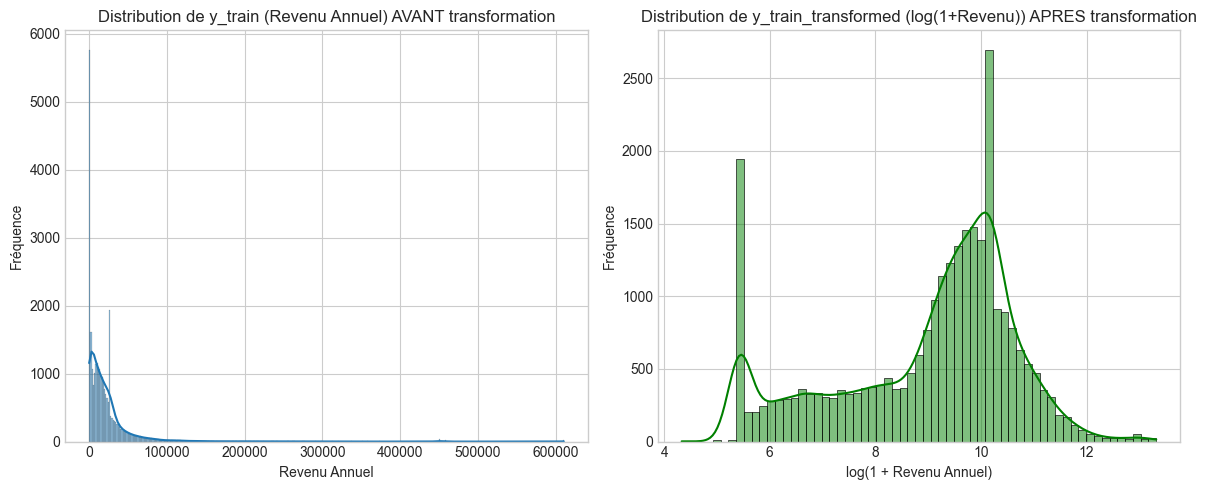


--- Aperçu de y_train_transformed (quelques valeurs) ---
38015   11.77
2281     9.81
36629    7.59
6087     9.91
11792    9.37
Name: Revenu_Annuel, dtype: float64


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution de y_train AVANT transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title("Distribution de y_train (Revenu Annuel) AVANT transformation")
plt.xlabel("Revenu Annuel")
plt.ylabel("Fréquence")

# Application de la transformation log1p
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Visualisation de la distribution de y_train APRES transformation
plt.subplot(1, 2, 2)
sns.histplot(y_train_transformed, kde=True, color='green')
plt.title("Distribution de y_train_transformed (log(1+Revenu)) APRES transformation")
plt.xlabel("log(1 + Revenu Annuel)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

print("\n--- Aperçu de y_train_transformed (quelques valeurs) ---")
print(y_train_transformed.head())

In [29]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule 960579d1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# S'assurer que les variables X_train, X_test, y_train_transformed, y_test sont disponibles
if 'X_train' in locals() and 'X_test' in locals() and \
   'y_train_transformed' in locals() and 'y_test' in locals():

    print("--- Entraînement du Modèle de Régression Linéaire ---")
    
    # 1. Initialisation du modèle
    linear_model = LinearRegression()
    
    # 2. Entraînement du modèle sur les données d'entraînement transformées
    print("Entraînement en cours...")
    linear_model.fit(X_train, y_train_transformed)
    print("Entraînement terminé.")
    
    # 3. Prédictions sur l'ensemble de test (les prédictions seront sur l'échelle log)
    predictions_log_lr = linear_model.predict(X_test)
    
    # 4. Transformation inverse des prédictions pour les ramener à l'échelle originale
    # np.expm1 est l'inverse de np.log1p
    predictions_lr = np.expm1(predictions_log_lr)
    
    # Optionnel : Certaines prédictions pourraient être négatives après expm1 si les valeurs log étaient très petites.
    # On peut les forcer à 0 ou à une petite valeur positive si le revenu ne peut être négatif.
    predictions_lr[predictions_lr < 0] = 0 
    
    print("\n--- Évaluation du Modèle de Régression Linéaire ---")
    
    # 5. Calcul des métriques d'évaluation
    # Comparaison entre y_test (valeurs réelles originales) et predictions_lr (valeurs prédites originales)
    mae_lr = mean_absolute_error(y_test, predictions_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr)) # RMSE
    r2_lr = r2_score(y_test, predictions_lr)
    
    print(f"MAE (Mean Absolute Error): {mae_lr:.2f} DH")
    print(f"RMSE (Root Mean Squared Error): {rmse_lr:.2f} DH")
    print(f"R² (Coefficient de détermination): {r2_lr:.4f}")
    
    # Affichage de quelques prédictions vs valeurs réelles
    print("\n--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) ---")
    df_predictions_lr = pd.DataFrame({'Réel': y_test.values, 'Prédit_LR': predictions_lr})
    display(df_predictions_lr.head(10))

    # Stocker les performances pour comparaison future
    if 'model_performance' not in locals():
        model_performance = {}
    model_performance['Linear Regression'] = {'MAE': mae_lr, 'RMSE': rmse_lr, 'R2': r2_lr}

else:
    print("ERREUR : Les ensembles de données X_train, X_test, y_train_transformed ou y_test ne sont pas définis.")
    print("Veuillez exécuter les cellules précédentes pour la séparation des données et la transformation de y.")


--- Entraînement du Modèle de Régression Linéaire ---
Entraînement en cours...
Entraînement terminé.

--- Évaluation du Modèle de Régression Linéaire ---
MAE (Mean Absolute Error): 11404.61 DH
RMSE (Root Mean Squared Error): 35252.35 DH
R² (Coefficient de détermination): 0.1278

--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) ---


,Réel,Prédit_LR
0,12382.00,15657.95
1,1525.00,2766.63
2,1147.00,1782.86
3,12120.00,18939.61
4,14941.00,18514.52
5,3102.00,7924.48
6,8995.00,12023.86
7,27120.00,34540.21
8,80190.00,44433.86
9,8789.00,2369.95


In [ ]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule d'évaluation de la Régression Linéaire)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Les autres imports (mean_squared_error, etc.) sont déjà faits

# S'assurer que les variables X_train, X_test, y_train_transformed, y_test sont disponibles
if 'X_train' in locals() and 'X_test' in locals() and \
   'y_train_transformed' in locals() and 'y_test' in locals() and \
   'model_performance' in locals() and 'RANDOM_STATE' in locals():

    print("\n--- Entraînement et Ajustement des Hyperparamètres pour DecisionTreeRegressor ---")

    # 1. Définir la grille d'hyperparamètres
    param_grid_dt = {
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': [None, 5, 6, 7, 10],
        'min_samples_split': [2, 3, 4, 5, 10]
    }

    # 2. Initialiser GridSearchCV
    # Pour la régression, on peut utiliser 'neg_mean_squared_error', 'r2', etc. comme scoring.
    # GridSearchCV maximise ce score.
    # cv=5 signifie une validation croisée à 5 plis.
    grid_search_dt = GridSearchCV(
        estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
        param_grid=param_grid_dt,
        cv=5, # Nombre de plis pour la validation croisée
        scoring='neg_mean_squared_error', # Métrique à optimiser (on cherche à minimiser MSE, donc maximiser -MSE)
        n_jobs=-1, # Utiliser tous les processeurs disponibles
        verbose=1 # Affiche des messages pendant l'exécution
    )

    # 3. Entraîner GridSearchCV sur les données d'entraînement transformées
    print("Ajustement des hyperparamètres pour DecisionTreeRegressor en cours (cela peut prendre du temps)...")
    grid_search_dt.fit(X_train, y_train_transformed)
    print("Ajustement terminé.")

    # 4. Obtenir les meilleurs hyperparamètres et le meilleur score
    print(f"\nMeilleurs hyperparamètres trouvés pour DecisionTreeRegressor : {grid_search_dt.best_params_}")
    # Le best_score_ est le score de validation croisée moyen du meilleur estimateur (ici, neg_mean_squared_error)
    print(f"Meilleur score (neg_mean_squared_error) de validation croisée : {grid_search_dt.best_score_:.4f}")
    
    # 5. Utiliser le meilleur estimateur trouvé par GridSearchCV
    best_dt_model = grid_search_dt.best_estimator_
    
    # 6. Prédictions sur l'ensemble de test (échelle log)
    predictions_log_dt = best_dt_model.predict(X_test)
    
    # 7. Transformation inverse des prédictions
    predictions_dt = np.expm1(predictions_log_dt)
    predictions_dt[predictions_dt < 0] = 0 # Assurer la non-négativité
    
    print("\n--- Évaluation du Modèle DecisionTreeRegressor (avec meilleurs hyperparamètres) ---")
    
    # 8. Calcul des métriques d'évaluation
    mae_dt = mean_absolute_error(y_test, predictions_dt)
    rmse_dt = np.sqrt(mean_squared_error(y_test, predictions_dt))
    r2_dt = r2_score(y_test, predictions_dt)
    
    print(f"MAE (Mean Absolute Error): {mae_dt:.2f} DH")
    print(f"RMSE (Root Mean Squared Error): {rmse_dt:.2f} DH")
    print(f"R² (Coefficient de détermination): {r2_dt:.4f}")
    
    # Affichage de quelques prédictions vs valeurs réelles
    print("\n--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) - Decision Tree ---")
    df_predictions_dt = pd.DataFrame({'Réel': y_test.values, 'Prédit_DT': predictions_dt})
    display(df_predictions_dt.head(10))

    # Stocker les performances
    model_performance['Decision Tree (Tuned)'] = {
        'MAE': mae_dt, 
        'RMSE': rmse_dt, 
        'R2': r2_dt,
        'Best Params': grid_search_dt.best_params_ # Stocker aussi les meilleurs paramètres
    }
    
    # Afficher le tableau comparatif mis à jour
    # Pour afficher 'Best Params' correctement, il faudra peut-être ajuster l'affichage du DataFrame
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    print("\n--- Tableau Comparatif des Performances des Modèles (Mis à Jour) ---")
    display(performance_df.sort_values(by='RMSE'))

else:
    print("ERREUR : Les ensembles de données, 'model_performance' ou 'RANDOM_STATE' ne sont pas définis.")
    print("Veuillez exécuter les cellules précédentes.")



--- Entraînement et Ajustement des Hyperparamètres pour DecisionTreeRegressor ---
Ajustement des hyperparamètres pour DecisionTreeRegressor en cours (cela peut prendre du temps)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Ajustement terminé.

Meilleurs hyperparamètres trouvés pour DecisionTreeRegressor : {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 10}
Meilleur score (neg_mean_squared_error) de validation croisée : -1.2620

--- Évaluation du Modèle DecisionTreeRegressor (avec meilleurs hyperparamètres) ---
MAE (Mean Absolute Error): 11205.13 DH
RMSE (Root Mean Squared Error): 35319.07 DH
R² (Coefficient de détermination): 0.1245

--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) - Decision Tree ---


,Réel,Prédit_DT
0,12382.00,17587.45
1,1525.00,3191.88
2,1147.00,1312.06
3,12120.00,13880.50
4,14941.00,13880.50
5,3102.00,10991.41
6,8995.00,17587.45
7,27120.00,43408.38
8,80190.00,43408.38
9,8789.00,2409.66



--- Tableau Comparatif des Performances des Modèles (Mis à Jour) ---


,MAE,RMSE,R2,Best Params
Linear Regression,11404.61,35252.35,0.13,NaN
Decision Tree (Tuned),11205.13,35319.07,0.12,"{'criterion': 'squared_error', 'max_depth': 5,..."


In [ ]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule d'évaluation du DecisionTreeRegressor)

from sklearn.ensemble import RandomForestRegressor
# GridSearchCV, mean_squared_error, etc. sont déjà importés

# S'assurer que les variables X_train, X_test, y_train_transformed, y_test sont disponibles
if 'X_train' in locals() and 'X_test' in locals() and \
   'y_train_transformed' in locals() and 'y_test' in locals() and \
   'model_performance' in locals() and 'RANDOM_STATE' in locals():

    print("\n--- Entraînement et Ajustement des Hyperparamètres pour RandomForestRegressor ---")

    # 1. Définir la grille d'hyperparamètres pour RandomForestRegressor
    param_grid_rf = {
        'n_estimators': [50, 100, 150, 200],
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': [None, 5, 10, 15, 20]
        # Note: min_samples_split et min_samples_leaf ne sont pas dans votre grille actuelle,
        # mais pourraient être ajoutés pour un ajustement plus fin si nécessaire.
    }
    # Nombre total de combinaisons: 4 * 2 * 5 = 40 candidats.
    # Multiplié par cv=5 plis (par exemple), cela fait 200 modèles à entraîner.
    # Cela peut prendre un certain temps.

    # 2. Initialiser GridSearchCV
    grid_search_rf = GridSearchCV(
        estimator=RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), # n_jobs=-1 dans l'estimateur pour l'entraînement de chaque arbre
        param_grid=param_grid_rf,
        cv=3, # Nombre de plis. Mettez 5 si le temps le permet pour une meilleure robustesse.
        scoring='neg_mean_squared_error', # Ou 'r2', 'neg_mean_absolute_error'
        n_jobs=-1, # Utiliser tous les processeurs pour GridSearchCV
        verbose=1  # Affiche des messages pendant l'exécution
    )

    # 3. Entraîner GridSearchCV
    num_candidates_rf = len(param_grid_rf['n_estimators']) * \
                        len(param_grid_rf['criterion']) * \
                        len(param_grid_rf['max_depth'])
    print(f"Ajustement des hyperparamètres pour RandomForestRegressor en cours ({num_candidates_rf} candidats, cv={grid_search_rf.cv})...")
    
    grid_search_rf.fit(X_train, y_train_transformed)
    print("Ajustement terminé.")

    # 4. Meilleurs hyperparamètres et score
    print(f"\nMeilleurs hyperparamètres trouvés pour RandomForestRegressor : {grid_search_rf.best_params_}")
    print(f"Meilleur score (neg_mean_squared_error) de validation croisée : {grid_search_rf.best_score_:.4f}")
    
    # 5. Meilleur estimateur
    best_rf_model = grid_search_rf.best_estimator_
    
    # 6. Prédictions sur l'ensemble de test (échelle log)
    predictions_log_rf = best_rf_model.predict(X_test)
    
    # 7. Transformation inverse des prédictions
    predictions_rf = np.expm1(predictions_log_rf)
    predictions_rf[predictions_rf < 0] = 0 # Assurer la non-négativité
    
    print("\n--- Évaluation du Modèle RandomForestRegressor (avec meilleurs hyperparamètres) ---")
    
    # 8. Calcul des métriques d'évaluation
    mae_rf = mean_absolute_error(y_test, predictions_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))
    r2_rf = r2_score(y_test, predictions_rf)
    
    print(f"MAE: {mae_rf:.2f} DH")
    print(f"RMSE: {rmse_rf:.2f} DH")
    print(f"R²: {r2_rf:.4f}")
    
    # Affichage de quelques prédictions vs valeurs réelles
    print("\n--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) - Random Forest ---")
    df_predictions_rf = pd.DataFrame({'Réel': y_test.values, 'Prédit_RF': predictions_rf})
    display(df_predictions_rf.head(10))

    # Stocker les performances
    model_performance['Random Forest (Tuned)'] = {
        'MAE': mae_rf, 
        'RMSE': rmse_rf, 
        'R2': r2_rf,
        'Best Params': grid_search_rf.best_params_
    }
    
    # Afficher le tableau comparatif mis à jour
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    print("\n--- Tableau Comparatif des Performances des Modèles (Mis à Jour) ---")
    display(performance_df.sort_values(by='RMSE'))

else:
    print("ERREUR : Les ensembles de données X_train, X_test, y_train_transformed, y_test, 'model_performance' ou 'RANDOM_STATE' ne sont pas définis.")
    print("Veuillez exécuter les cellules précédentes.")



--- Entraînement et Ajustement des Hyperparamètres pour RandomForestRegressor ---
Ajustement des hyperparamètres pour RandomForestRegressor en cours (40 candidats, cv=3)...
Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule d'évaluation du RandomForestRegressor)

from sklearn.ensemble import GradientBoostingRegressor
# GridSearchCV, mean_squared_error, etc. sont déjà importés

# S'assurer que les variables X_train, X_test, y_train_transformed, y_test sont disponibles
if 'X_train' in locals() and 'X_test' in locals() and \
   'y_train_transformed' in locals() and 'y_test' in locals() and \
   'model_performance' in locals() and 'RANDOM_STATE' in locals():

    print("\n--- Entraînement et Ajustement des Hyperparamètres pour GradientBoostingRegressor ---")

    # 1. Définir la grille d'hyperparamètres pour GradientBoostingRegressor
    param_grid_gb = {
        'loss': ['squared_error', 'absolute_error'],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.5, 0.8, 1.0]
        # 'max_depth' est aussi un hyperparamètre important, souvent fixé à une petite valeur (ex: 3, 5)
        # pour les modèles de boosting. Vous pourriez l'ajouter si le temps le permet.
        # Exemple: 'max_depth': [3, 5, 7]
    }
    # Nombre total de combinaisons: 2 * 3 * 3 * 3 = 54 candidats.
    # Multiplié par cv=3 plis, cela fait 162 modèles à entraîner.

    # 2. Initialiser GridSearchCV
    grid_search_gb = GridSearchCV(
        estimator=GradientBoostingRegressor(random_state=RANDOM_STATE),
        param_grid=param_grid_gb,
        cv=3, # Nombre de plis. Mettez 5 si le temps le permet.
        scoring='neg_mean_squared_error',
        n_jobs=-1, # Utiliser tous les processeurs
        verbose=1
    )

    # 3. Entraîner GridSearchCV
    num_candidates_gb = len(param_grid_gb['loss']) * \
                        len(param_grid_gb['learning_rate']) * \
                        len(param_grid_gb['n_estimators']) * \
                        len(param_grid_gb['subsample'])
    print(f"Ajustement des hyperparamètres pour GradientBoostingRegressor en cours ({num_candidates_gb} candidats, cv={grid_search_gb.cv})...")
    
    grid_search_gb.fit(X_train, y_train_transformed)
    print("Ajustement terminé.")

    # 4. Meilleurs hyperparamètres et score
    print(f"\nMeilleurs hyperparamètres trouvés pour GradientBoostingRegressor : {grid_search_gb.best_params_}")
    print(f"Meilleur score (neg_mean_squared_error) de validation croisée : {grid_search_gb.best_score_:.4f}")
    
    # 5. Meilleur estimateur
    best_gb_model = grid_search_gb.best_estimator_
    
    # 6. Prédictions sur l'ensemble de test (échelle log)
    predictions_log_gb = best_gb_model.predict(X_test)
    
    # 7. Transformation inverse des prédictions
    predictions_gb = np.expm1(predictions_log_gb)
    predictions_gb[predictions_gb < 0] = 0 # Assurer la non-négativité
    
    print("\n--- Évaluation du Modèle GradientBoostingRegressor (avec meilleurs hyperparamètres) ---")
    
    # 8. Calcul des métriques d'évaluation
    mae_gb = mean_absolute_error(y_test, predictions_gb)
    rmse_gb = np.sqrt(mean_squared_error(y_test, predictions_gb))
    r2_gb = r2_score(y_test, predictions_gb)
    
    print(f"MAE: {mae_gb:.2f} DH")
    print(f"RMSE: {rmse_gb:.2f} DH")
    print(f"R²: {r2_gb:.4f}")
    
    # Affichage de quelques prédictions vs valeurs réelles
    print("\n--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) - Gradient Boosting ---")
    df_predictions_gb = pd.DataFrame({'Réel': y_test.values, 'Prédit_GB': predictions_gb})
    display(df_predictions_gb.head(10))

    # Stocker les performances
    model_performance['Gradient Boosting (Tuned)'] = {
        'MAE': mae_gb, 
        'RMSE': rmse_gb, 
        'R2': r2_gb,
        'Best Params': grid_search_gb.best_params_
    }
    
    # Afficher le tableau comparatif mis à jour
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    print("\n--- Tableau Comparatif des Performances des Modèles (Mis à Jour) ---")
    display(performance_df.sort_values(by='RMSE'))

else:
    print("ERREUR : Les ensembles de données X_train, X_test, y_train_transformed, y_test, 'model_performance' ou 'RANDOM_STATE' ne sont pas définis.")
    print("Veuillez exécuter les cellules précédentes.")


In [ ]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule d'évaluation du GradientBoostingRegressor)

from sklearn.neural_network import MLPRegressor
# GridSearchCV, mean_squared_error, etc. sont déjà importés

# S'assurer que les variables X_train, X_test, y_train_transformed, y_test sont disponibles
if 'X_train' in locals() and 'X_test' in locals() and \
   'y_train_transformed' in locals() and 'y_test' in locals() and \
   'model_performance' in locals() and 'RANDOM_STATE' in locals():

    print("\n--- Entraînement et Ajustement des Hyperparamètres pour MLPRegressor ---")

    # 1. Définir la grille d'hyperparamètres pour MLPRegressor
    # ATTENTION : CETTE GRILLE EST TRÈS GRANDE !
    # param_grid_mlp = {
    #    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    #    'activation': ['relu', 'tanh', 'logistic'],
    #    'solver': ['adam', 'sgd'],
    #    'alpha': [0.0001, 0.001, 0.01],
    #    'learning_rate': ['constant', 'invscaling', 'adaptive'], # Surtout pour SGD
    #    'learning_rate_init': [0.001, 0.01, 0.1],
    #    'max_iter': [100, 200, 300] # Nombre d'époques
    #}
    
    # --- OPTION : GRILLE RÉDUITE POUR UN TEST PLUS RAPIDE ---
    # Décommentez cette section et commentez la grille complète ci-dessus pour un test
    param_grid_mlp_reduced = {
        'hidden_layer_sizes': [(50,), (100,)], # Réduit
        'activation': ['relu'],                # Réduit
        'solver': ['adam'],                   # Réduit
        'alpha': [0.001],                     # Réduit
        'learning_rate_init': [0.001, 0.01],  # Réduit
        'max_iter': [100, 200]                # Réduit
        # 'learning_rate' est moins critique pour 'adam'
    }
    param_grid_to_use = param_grid_mlp_reduced
    # print("UTILISATION D'UNE GRILLE D'HYPERPARAMÈTRES RÉDUITE POUR MLPRegressor.")
    # --- FIN OPTION GRILLE RÉDUITE ---

    # Par défaut, utiliser la grille complète (attention au temps)
    # param_grid_to_use = param_grid_mlp
    # print("ATTENTION : Utilisation de la grille d'hyperparamètres COMPLÈTE pour MLPRegressor. Cela peut être EXTRÊMEMENT long.")


    # 2. Initialiser GridSearchCV
    # Note: MLPRegressor n'a pas de n_jobs interne pour la parallélisation de l'entraînement lui-même.
    grid_search_mlp = GridSearchCV(
        estimator=MLPRegressor(random_state=RANDOM_STATE, early_stopping=True, n_iter_no_change=10), # early_stopping peut aider
        param_grid=param_grid_to_use,
        cv=2, # Réduit à 2 plis pour limiter le temps. Mettez 3 si possible.
        scoring='neg_mean_squared_error',
        n_jobs=-1, # Parallélise les fits de GridSearchCV
        verbose=2  # Augmenté pour plus de détails pendant la longue exécution
    )

    # 3. Entraîner GridSearchCV
    num_combinations = 1
    for key in param_grid_to_use:
        num_combinations *= len(param_grid_to_use[key])
    
    print(f"Ajustement des hyperparamètres pour MLPRegressor en cours ({num_combinations} candidats, cv={grid_search_mlp.cv})...")
    print("Cela va prendre BEAUCOUP de temps. Soyez patient ou envisagez d'utiliser RandomizedSearchCV ou une grille réduite.")
    
    try:
        grid_search_mlp.fit(X_train, y_train_transformed)
        print("Ajustement terminé.")

        # 4. Meilleurs hyperparamètres et score
        print(f"\nMeilleurs hyperparamètres trouvés pour MLPRegressor : {grid_search_mlp.best_params_}")
        print(f"Meilleur score (neg_mean_squared_error) de validation croisée : {grid_search_mlp.best_score_:.4f}")
        
        # 5. Meilleur estimateur
        best_mlp_model = grid_search_mlp.best_estimator_
        
        # 6. Prédictions sur l'ensemble de test (échelle log)
        predictions_log_mlp = best_mlp_model.predict(X_test)
        
        # 7. Transformation inverse des prédictions
        predictions_mlp = np.expm1(predictions_log_mlp)
        predictions_mlp[predictions_mlp < 0] = 0 # Assurer la non-négativité
        
        print("\n--- Évaluation du Modèle MLPRegressor (avec meilleurs hyperparamètres) ---")
        
        # 8. Calcul des métriques d'évaluation
        mae_mlp = mean_absolute_error(y_test, predictions_mlp)
        rmse_mlp = np.sqrt(mean_squared_error(y_test, predictions_mlp))
        r2_mlp = r2_score(y_test, predictions_mlp)
        
        print(f"MAE: {mae_mlp:.2f} DH")
        print(f"RMSE: {rmse_mlp:.2f} DH")
        print(f"R²: {r2_mlp:.4f}")
        
        print("\n--- Aperçu des Prédictions vs Valeurs Réelles (Échelle Originale) - MLP Regressor ---")
        df_predictions_mlp = pd.DataFrame({'Réel': y_test.values, 'Prédit_MLP': predictions_mlp})
        display(df_predictions_mlp.head(10))

        # Stocker les performances
        model_performance['MLP Regressor (Tuned)'] = {
            'MAE': mae_mlp, 
            'RMSE': rmse_mlp, 
            'R2': r2_mlp,
            'Best Params': grid_search_mlp.best_params_
        }
        
    except Exception as e:
        print(f"Une erreur est survenue pendant l'ajustement ou l'évaluation du MLPRegressor : {e}")
        import traceback
        print(traceback.format_exc())
        model_performance['MLP Regressor (Tuned)'] = {
            'MAE': np.nan, 
            'RMSE': np.nan, 
            'R2': np.nan,
            'Best Params': 'Error during training'
        }

    # Afficher le tableau comparatif mis à jour
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    print("\n--- Tableau Comparatif des Performances des Modèles (Mis à Jour) ---")
    display(performance_df.sort_values(by='RMSE', ascending=True))

else:
    print("ERREUR : Les ensembles de données X_train, X_test, y_train_transformed, y_test, 'model_performance' ou 'RANDOM_STATE' ne sont pas définis.")
    print("Veuillez exécuter les cellules précédentes.")


In [ ]:
# ...existing code...
# CELLULE SUIVANTE (après la cellule d'évaluation du MLPRegressor)

import pandas as pd # S'assurer que pandas est importé

if 'model_performance' in locals() and isinstance(model_performance, dict) and model_performance:
    print("\n--- Tableau Comparatif Final des Performances des Modèles ---")
    
    # Créer le DataFrame à partir du dictionnaire model_performance
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    
    # S'assurer que les colonnes de métriques existent avant de trier
    sort_column = 'RMSE'
    if sort_column not in performance_df.columns:
        # Si RMSE n'existe pas (par exemple, si une exécution a échoué et a mis des NaN),
        # essayer de trier par R2 ou MAE, ou simplement afficher sans trier.
        if 'R2' in performance_df.columns:
            sort_column = 'R2'
            print(f"Tri par '{sort_column}' (décroissant car R2 est meilleur quand il est élevé).")
            display(performance_df.sort_values(by=sort_column, ascending=False))
        elif 'MAE' in performance_df.columns:
            sort_column = 'MAE'
            print(f"Tri par '{sort_column}' (croissant).")
            display(performance_df.sort_values(by=sort_column, ascending=True))
        else:
            print("Impossible de trier par RMSE, R2 ou MAE. Affichage non trié.")
            display(performance_df)
    else:
        print(f"Tri par '{sort_column}' (croissant).")
        display(performance_df.sort_values(by=sort_column, ascending=True))

    # Identifier le meilleur modèle basé sur le RMSE (le plus bas est le meilleur)
    # Gérer le cas où il y a des NaN dans RMSE (par exemple, si un modèle a échoué)
    if 'RMSE' in performance_df.columns and performance_df['RMSE'].notna().any():
        best_model_name = performance_df['RMSE'].idxmin()
        best_model_stats = performance_df.loc[best_model_name]
        
        print(f"\n--- Meilleur Modèle Sélectionné (basé sur le RMSE le plus bas) ---")
        print(f"Nom du Modèle : {best_model_name}")
        print(f"MAE : {best_model_stats.get('MAE', 'N/A'):.2f} DH")
        print(f"RMSE : {best_model_stats.get('RMSE', 'N/A'):.2f} DH")
        print(f"R² : {best_model_stats.get('R2', 'N/A'):.4f}")
        print(f"Meilleurs Hyperparamètres : {best_model_stats.get('Best Params', 'N/A')}")
        
        # Stocker le nom du meilleur modèle et ses paramètres pour l'étape suivante
        # (Si vous avez utilisé RandomizedSearchCV, best_estimator_ est déjà le modèle entraîné)
        # Si vous avez utilisé GridSearchCV, grid_search_xx.best_estimator_ est le modèle
        # Nous allons supposer que vous avez stocké le meilleur estimateur de chaque GridSearchCV
        # dans une variable (ex: best_rf_model, best_gb_model, etc.) ou que vous pouvez le récupérer.
        
        # Pour l'instant, nous nous concentrons sur l'identification.
        # La section 6.6 de votre document suggère de ré-appliquer le modèle sélectionné.
        # best_estimator_ de GridSearchCV est déjà ce modèle entraîné sur X_train.

    else:
        print("\nImpossible de déterminer le meilleur modèle car la colonne RMSE est manquante ou ne contient que des NaN.")

else:
    print("Le dictionnaire 'model_performance' n'est pas défini ou est vide. Veuillez exécuter les cellules d'entraînement des modèles.")


In [ ]:
# ...existing code...
# CELLULE SUIVANTE

# Supposons que 'best_model_name' a été défini dans la cellule précédente
# et que vous avez les objets GridSearchCV correspondants (ex: grid_search_rf, grid_search_gb, etc.)

if 'best_model_name' in locals() and best_model_name:
    print(f"\n--- Section 6.6 : Test du Modèle Sélectionné : {best_model_name} ---")

    final_model_estimator = None
    best_params_for_final_model = None

    # Récupérer le meilleur estimateur et ses paramètres
    # Vous devrez adapter cette section en fonction de comment vous avez nommé vos objets GridSearchCV
    if best_model_name == 'Linear Regression' and 'linear_model' in locals(): # Cas spécial pour la régression linéaire (pas de GridSearchCV)
        final_model_estimator = linear_model # Déjà entraîné
        best_params_for_final_model = "N/A (pas d'hyperparamètres ajustés via GridSearchCV)"
        # Les prédictions et évaluations ont déjà été faites et stockées.
        # On peut juste ré-afficher les stats du tableau.
        print("La Régression Linéaire n'a pas utilisé GridSearchCV. Ses performances sont déjà finales.")
        if 'Linear Regression' in model_performance:
            stats_lr = model_performance['Linear Regression']
            print(f"  MAE: {stats_lr.get('MAE', 'N/A'):.2f} DH")
            print(f"  RMSE: {stats_lr.get('RMSE', 'N/A'):.2f} DH")
            print(f"  R²: {stats_lr.get('R2', 'N/A'):.4f}")
        else:
            print("Statistiques pour la Régression Linéaire non trouvées dans model_performance.")


    elif best_model_name == 'Decision Tree (Tuned)' and 'grid_search_dt' in locals():
        final_model_estimator = grid_search_dt.best_estimator_
        best_params_for_final_model = grid_search_dt.best_params_
    elif best_model_name == 'Random Forest (Tuned)' and 'grid_search_rf' in locals():
        final_model_estimator = grid_search_rf.best_estimator_
        best_params_for_final_model = grid_search_rf.best_params_
    elif best_model_name == 'Gradient Boosting (Tuned)' and 'grid_search_gb' in locals():
        final_model_estimator = grid_search_gb.best_estimator_
        best_params_for_final_model = grid_search_gb.best_params_
    elif best_model_name == 'MLP Regressor (Tuned)' and 'grid_search_mlp' in locals():
        final_model_estimator = grid_search_mlp.best_estimator_
        best_params_for_final_model = grid_search_mlp.best_params_
    else:
        print(f"ATTENTION : Impossible de récupérer l'estimateur pour le modèle '{best_model_name}'. Vérifiez les noms des variables GridSearchCV.")

    if final_model_estimator is not None and best_model_name != 'Linear Regression':
        print(f"Le meilleur estimateur pour '{best_model_name}' a été récupéré.")
        print(f"Hyperparamètres optimaux : {best_params_for_final_model}")

        # Le final_model_estimator est déjà entraîné sur X_train, y_train_transformed par GridSearchCV (refit=True par défaut)
        # Donc, nous pouvons directement l'utiliser pour prédire sur X_test.

        print(f"\nApplication du modèle '{best_model_name}' sur l'ensemble de test...")
        predictions_log_final = final_model_estimator.predict(X_test)
        
        # Transformation inverse
        predictions_final = np.expm1(predictions_log_final)
        predictions_final[predictions_final < 0] = 0
        
        # Calcul des métriques finales
        mae_final = mean_absolute_error(y_test, predictions_final)
        rmse_final = np.sqrt(mean_squared_error(y_test, predictions_final))
        r2_final = r2_score(y_test, predictions_final)
        
        print("\n--- Performances Finales du Modèle Sélectionné sur l'Ensemble de Test ---")
        print(f"Modèle : {best_model_name}")
        print(f"MAE : {mae_final:.2f} DH")
        print(f"RMSE : {rmse_final:.2f} DH")
        print(f"R² : {r2_final:.4f}")

        # Vérification de la cohérence avec le tableau model_performance
        if best_model_name in model_performance:
            stored_stats = model_performance[best_model_name]
            if (abs(stored_stats.get('RMSE', np.inf) - rmse_final) < 1e-9 and \
                abs(stored_stats.get('R2', -np.inf) - r2_final) < 1e-9) :
                print("\nLes performances finales recalculées correspondent à celles stockées dans le tableau comparatif. C'est attendu.")
            else:
                print("\nATTENTION : Les performances finales recalculées diffèrent légèrement de celles stockées. À vérifier.")
        
        print("\n--- Aperçu des Prédictions Finales vs Valeurs Réelles ---")
        df_predictions_final = pd.DataFrame({'Réel': y_test.values, f'Prédit_{best_model_name.split(" ")[0]}': predictions_final})
        display(df_predictions_final.head(10))
        
        # Vous pouvez maintenant décider si vous êtes satisfait des résultats.
        # Si oui, vous passeriez au déploiement.
        # Sinon, retour aux étapes précédentes.
        if r2_final > 0.5: # Exemple de seuil de satisfaction (à adapter)
            print(f"\nLe modèle '{best_model_name}' avec un R² de {r2_final:.4f} semble raisonnablement performant.")
        else:
            print(f"\nLe modèle '{best_model_name}' avec un R² de {r2_final:.4f} pourrait nécessiter des améliorations supplémentaires.")
            print("Considérez de revoir : l'ingénierie des caractéristiques, la sélection des hyperparamètres, ou d'autres types de modèles.")

elif not best_model_name:
     print("Aucun meilleur modèle n'a été identifié dans la cellule précédente.")
else:
    print(f"Le modèle sélectionné '{best_model_name}' est la Régression Linéaire, ses performances finales ont déjà été affichées.")
